# Project: Predicting physical health

made by:
Nienke van de Kimmenade, Hasty Shakibania, and Sodon Ser-Od



## Basics:

Importing important libraries that we need to use for the rest of this project. These are just the basics and more libraries will be imported throughout our datat analysis

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

# EDA

Loading the dataset into google colab so we can work with it and we can see the first values of it. As you can see does this dataset contain quite a lot of different variables. The objective of our project is to eventualy predict somone's physical health


In [3]:
path = '/Users/sodon/Desktop/AI/medcenter.csv'
medcenter = pd.read_csv(path)
medcenter.head(10)



Walking Difficulty Torsades de Pointes Skin Cancer  Hours of sleep  \
0                  Y                   Y           N            10.0   
1                  N                   Y           N             7.0   
2                  N                   Y           N             7.0   
3                  Y                   Y           N             8.0   
4                  Y                   Y           N             8.0   
5                  Y                   Y           N             9.0   
6                  N                   Y           N             6.0   
7                  N                   Y           N             7.0   
8                  Y                   Y           N             8.0   
9                  Y                   Y           Y             7.0   

  How do you Feel Asthma Status Do you Exercise Gender Kidney Disease  \
0            Good             N               Y      F              N   
1            Fair             Y               N      F              N   
2            Good             N               N      M              N   
3            Good             N               N      F              N   
4            Fair             N               Y      M              Y   
5            Fair             N               Y      F              N   
6            Good             N               N      M              N   
7            Good             N               Y      F              Y   
8            Poor             Y               N      M              N   
9            Good             N               Y      M              N   

  Is Smoking Ethnicity Diabetes How many Drinks per Week    Age Group  \
0          Y     White        N                        N  80 or older   
1          N     White        Y                        N        65-69   
2          N     White        N                        N        60-64   
3          Y     White        N                        N        65-69   
4          N     White        Y                        N        70-74   
5          Y     White        N                        N  80 or older   
6          Y     White        Y                        N        75-79   
7          N     White        Y                        N        70-74   
8          Y     White        Y                        N        70-74   
9          Y     White        Y                        N  80 or older   

   Mental Health  Body Mass Index  Physical Health History of Stroke  \
0            0.0            15.55              7.0                 Y   
1            0.0            38.62              2.0                 N   
2            0.0            21.62              3.0                 N   
3            0.0            22.14              0.0                 N   
4            0.0            43.05              0.0                 N   
5            0.0            23.38             15.0                 N   
6            0.0            30.86              0.0                 N   
7           10.0            32.12             15.0                 Y   
8            0.0            21.41             30.0                 N   
9            1.0            34.97              0.0                 N   

   Patient ID  
0      100074  
1      100086  
2      100094  
3      100154  
4      100158  
5      100201  
6      100244  
7      100257  
8      100287  
9      100307

Since our datat set has a lot of different variables, here is a list of their meanings:

• Walking Difficulty: Indicates if the individual has difficulty walking (Y for Yes, N for No)

• Torsades de Pointes: A specific type of abnormal heart rhythm (Y for Yes, N for No)

• Skin Cancer: Indicates if the individual has/had skin cancer (Y for Yes, N for No)

• Hours of Sleep: Average number of hours the individual sleeps per night

• How do you Feel: The individual's self-reported feeling about their health (Poor, Fair, Good,
Very good, Excellent)

• Asthma Status: Indicates if the individual has asthma (Y for Yes, N for No)

• Do you Exercise: Indicates if the individual exercises regularly (Y for Yes, N for No)

• Gender: Gender of the individual (M for Male, F for Female)

• Kidney Disease: Indicates if the individual has kidney disease (Y for Yes, N for No)

• Is Smoking: Indicates if the individual smokes (Y for Yes, N for No)

• Ethnicity: The ethnic group the individual identifies with (e.g., White, Black, etc.)

• Diabetes: Indicates if the individual has diabetes (Y for Yes, N for No)

• How many Drinks per Week: Number of alcoholic beverages the individual consumes per week

• Age Group: Age bracket the individual falls under (e.g., 65-69, 70-74, etc.)

• Mental Health: Score indicating the mental health status (higher is better)

• Body Mass Index (BMI): A measure that uses weight and height to estimate body fat

• Physical Health: Score indicating the physical health status (higher is better)

• History of Stroke: Indicates if the individual has had a stroke (Y for Yes, N for No)

• Patient ID: A unique identifier for each individual
Assignment



### Check if all the data are distinct

We are going to check if there are no overlapping values in the patient ID variable. Since the answer is True, we do not have overlapping values and the data is distinct. We are also already going to do some descriptive statistics of our dataset. This means that we are going to look at the mean, cound, std etc of numerical variables in our dataset. This can already give us a better understanding of our dataset.

In [4]:
is_distinct = medcenter['Patient ID'].nunique() == len(medcenter['Patient ID'])
print(f'Values in the column are distinct: {is_distinct}')


Values in the column are distinct: True


In [5]:
data = medcenter.drop(columns=['Patient ID'])

type_column = data.describe()
print(type_column)

       Hours of sleep  Mental Health  Body Mass Index  Physical Health
count   261311.000000  261311.000000    261311.000000    261311.000000
mean         7.099406       3.907199        28.355734         3.474951
std          1.446752       7.969255         6.361975         8.079793
min          1.000000       0.000000        12.020000         0.000000
25%          6.000000       0.000000        24.030000         0.000000
50%          7.000000       0.000000        27.350000         0.000000
75%          8.000000       3.000000        31.470000         2.000000
max         24.000000      30.000000        94.850000        30.000000


Here we are coding some descriptive statistics for the 'mental health' variablel. The results are already containing some questionable values. The mean of mental health is 3.9 which is very low. Also more than 50% of the people in our datatset have a mental health of 0. This is very concerning.

In [6]:
column = medcenter['Mental Health']
type_column = column.describe()
print(type_column)

count    261311.000000
mean          3.907199
std           7.969255
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: Mental Health, dtype: float64


Descriptive Statistics for the variable 'How many Drinks per Week'

In [7]:
column = medcenter['How many Drinks per Week']
type_column = column.describe()
print(type_column)

count     261311
unique         2
top            N
freq      243614
Name: How many Drinks per Week, dtype: object


Now we are ging to check for missing values for each column. We do not have any so that is a good start.

In [8]:
nan_count = medcenter.isna().sum()
print(nan_count)

Walking Difficulty          0
Torsades de Pointes         0
Skin Cancer                 0
Hours of sleep              0
How do you Feel             0
Asthma Status               0
Do you Exercise             0
Gender                      0
Kidney Disease              0
Is Smoking                  0
Ethnicity                   0
Diabetes                    0
How many Drinks per Week    0
Age Group                   0
Mental Health               0
Body Mass Index             0
Physical Health             0
History of Stroke           0
Patient ID                  0
dtype: int64


In [ ]:
missing_values = medcenter.isnull().sum()
print(missing_values)

Walking Difficulty          0
Torsades de Pointes         0
Skin Cancer                 0
Hours of sleep              0
How do you Feel             0
Asthma Status               0
Do you Exercise             0
Gender                      0
Kidney Disease              0
Is Smoking                  0
Ethnicity                   0
Diabetes                    0
How many Drinks per Week    0
Age Group                   0
Mental Health               0
Body Mass Index             0
Physical Health             0
History of Stroke           0
Patient ID                  0
dtype: int64


# Data Visualization

Now we are goiing to start with our data visualization. During this part we are trying to get a better understanding of our dataset. We want to see if we can find some correlations between individual variables by creating different charts. We also going to use different charts to vizualise the distribution of variables in our dataset.

This barchart shows the distribution of the age of the people in our dataset. It does not show any unexpected things. You can see that there are more older people, but this does not raise any concerns

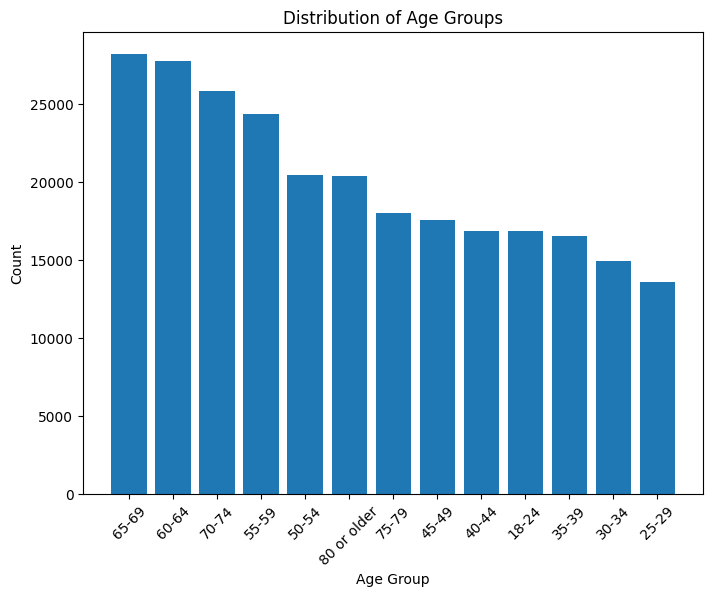

In [9]:
df = pd.DataFrame(medcenter)


# Calculate counts for each age group
counts = df['Age Group'].value_counts()
# Create a bar chart for age groups
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)
plt.show()

This piecart shows that the distribution of mental health in our dataset is very unbalanced. In the description of the dataset is written that the higher someone's value for mental health is, the better his mental health. It raises some concerns that more than half of the people in the dataset have a mental health of 0. Does this mean that they are death? Is 0 used as a missing value? Or maybe it has some other meaning.

This was the first moment in our data analysis that we ran into something that was unclear for us. We need to do some more analysis of our data to find out what the 0 means

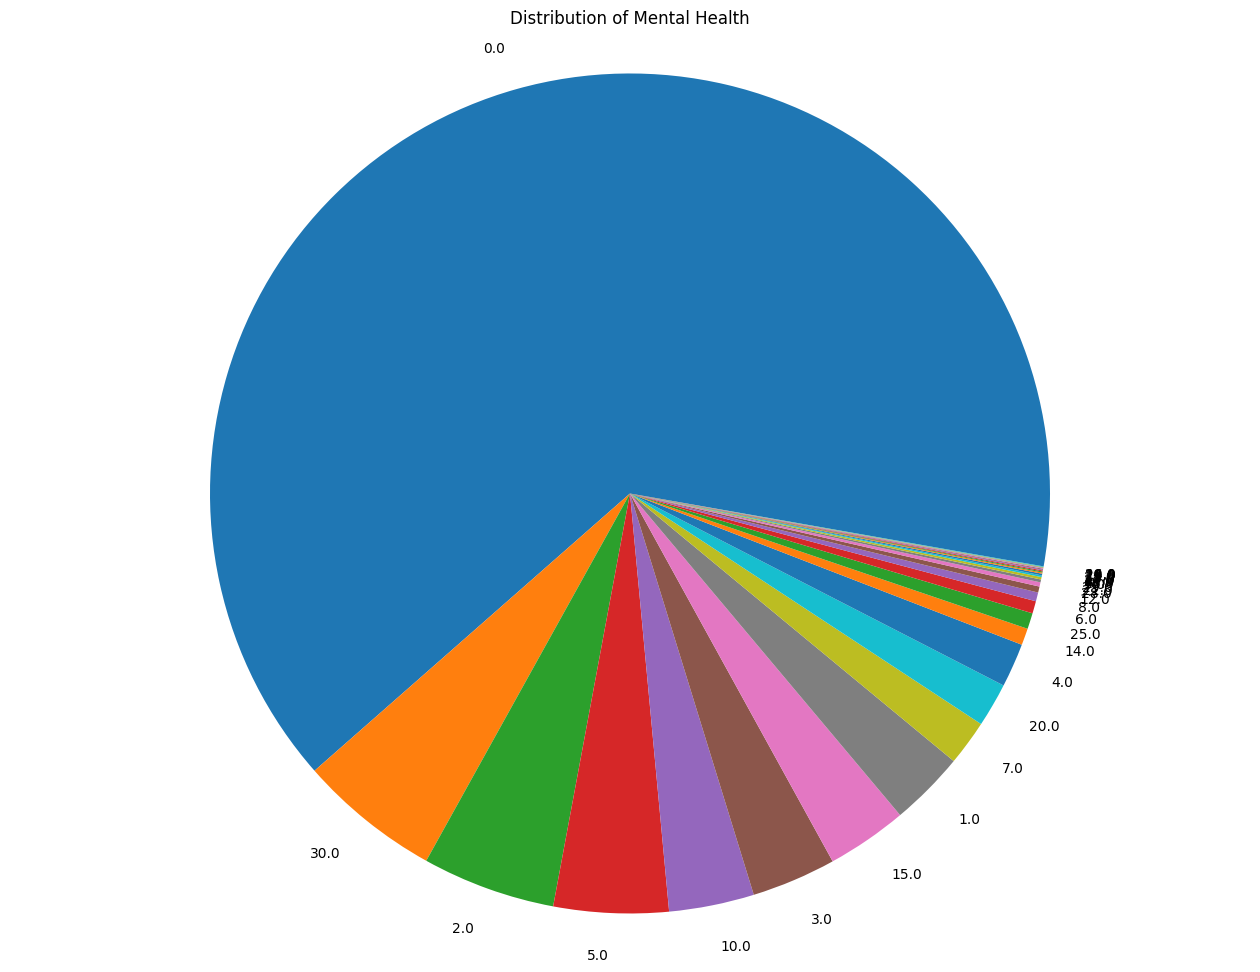

In [10]:
df = pd.DataFrame(medcenter)

# Calculate counts for each Mental health category
counts = df['Mental Health'].value_counts()

# Create a pie chart for Mental health
plt.figure(figsize=(16, 12))
plt.pie(counts, labels=counts.index, startangle=350)
plt.axis('equal')
plt.title("Distribution of Mental Health")
plt.show()

The percentage of people with 0 in their mental health is: Mental Health
True     167898
False     93413
Name: count, dtype: int64
Mental Health
True     167898
False     93413
Name: count, dtype: int64


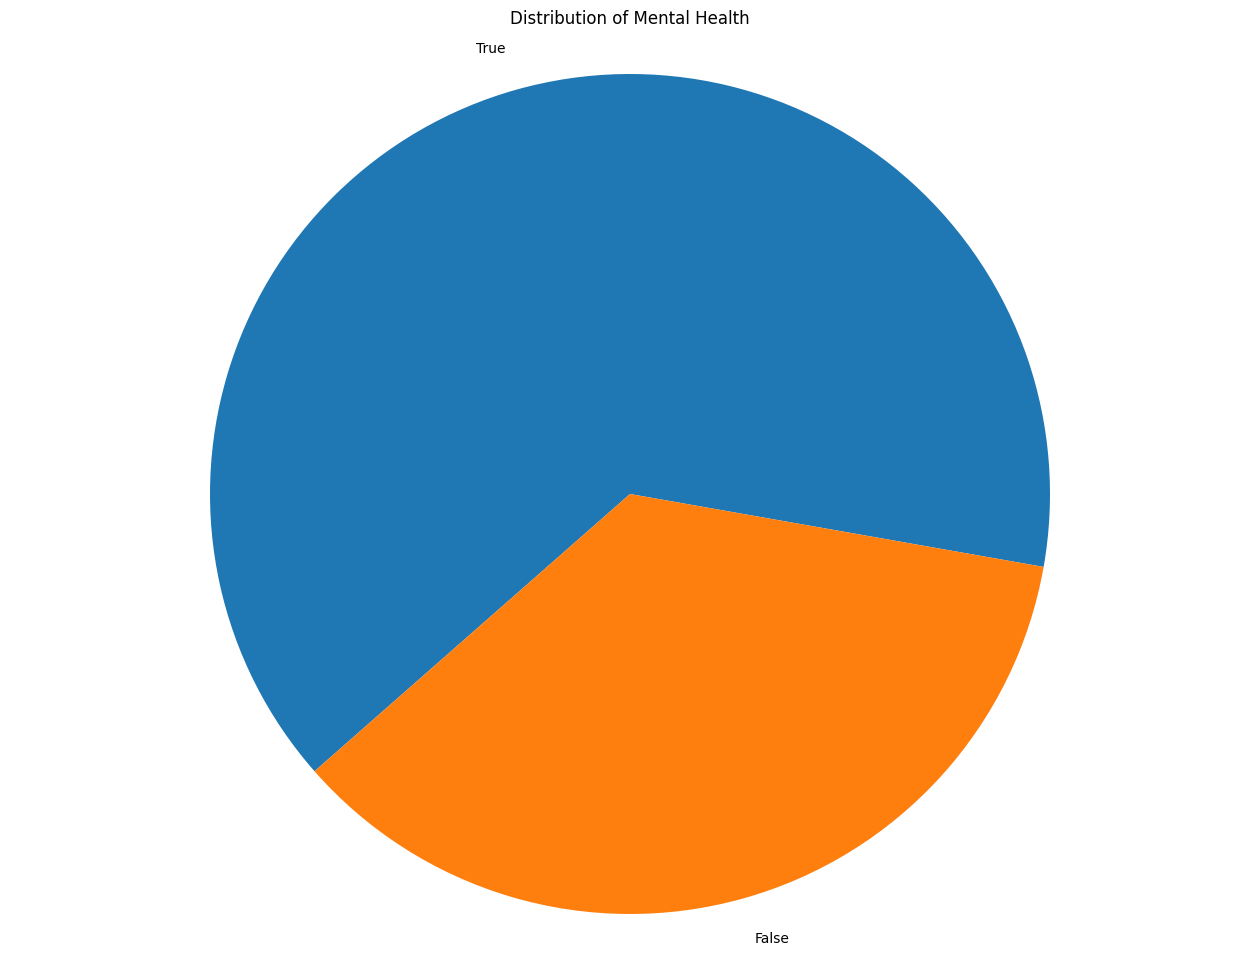

In [11]:
df = pd.DataFrame(medcenter)

# Calculate counts for each mental health category
counts = (df['Mental Health']== 0).value_counts()
counts_mental = (counts / len(df)) * 100
print(f"The percentage of people with 0 in their mental health is: {counts}")
print(counts)
# Create a pie chart for mental health
plt.figure(figsize=(16, 12))
plt.pie(counts, labels=counts.index, startangle=350)
plt.axis('equal')
plt.title("Distribution of Mental Health")
plt.show()

We made a piechart to look at the distribution of physical health in our dataset. As you can see is there a very unequal distribution of physical health. More than 60% of the people in our datatset seem to have a physical health of 0

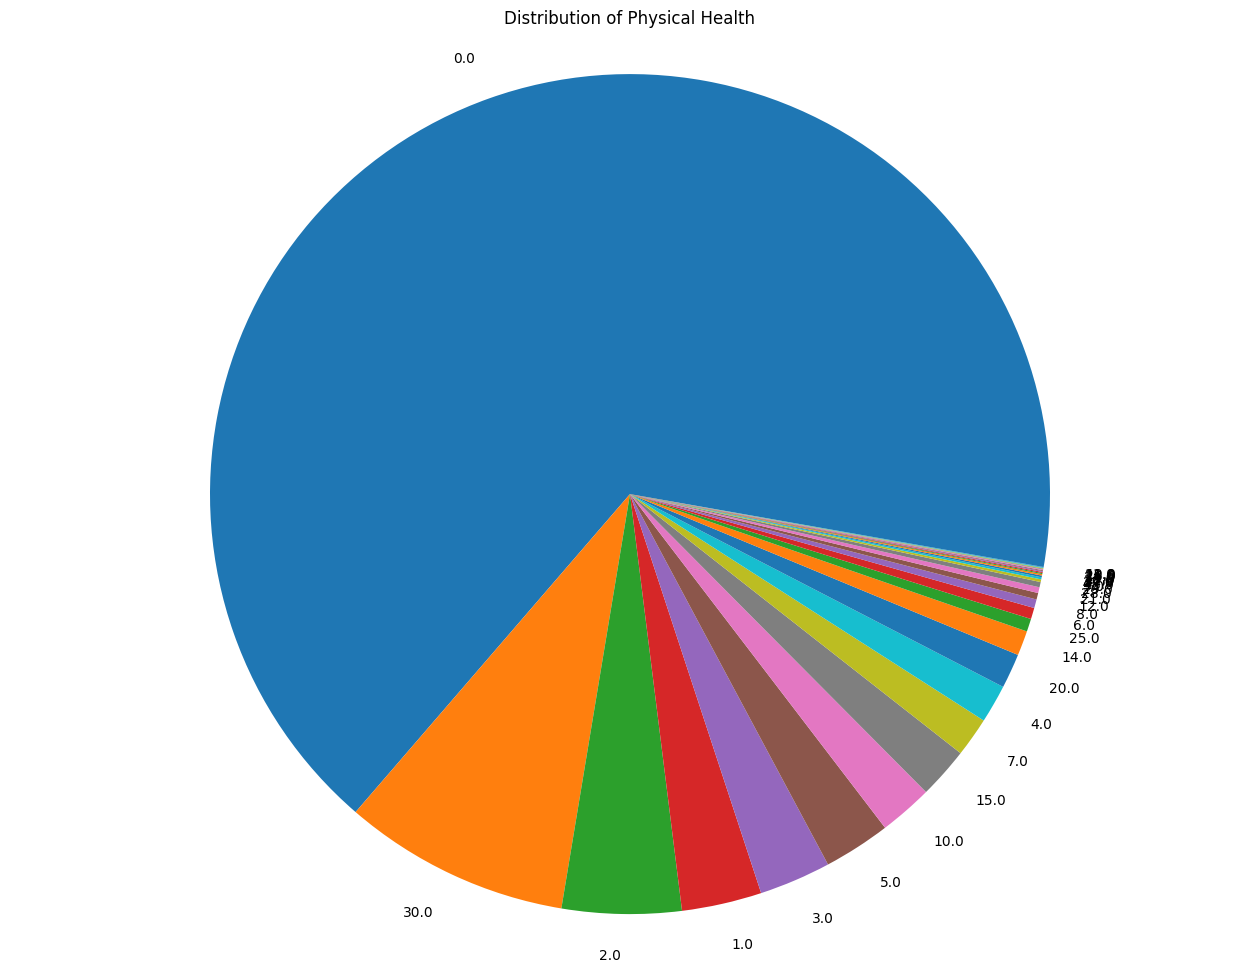

In [ ]:
df = pd.DataFrame(medcenter)

# Calculate counts for each Physical health category
counts = df['Physical Health'].value_counts()

# Create a pie chart for Physical health
plt.figure(figsize=(16, 12))
plt.pie(counts, labels=counts.index, startangle=350)
plt.axis('equal')
plt.title("Distribution of Physical Health")
plt.show()

Since this pie chart can be a viewed as a bit chaotic, we also made a bar chart for Physical Health which is a lot easier to look at

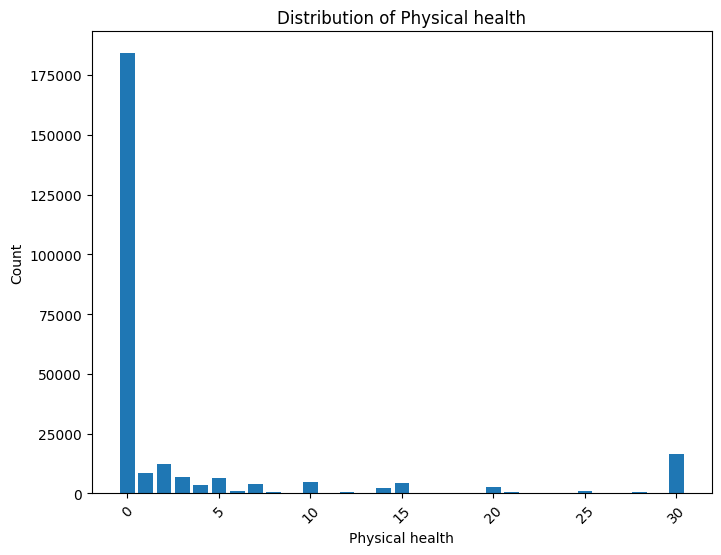

In [12]:
df = pd.DataFrame(medcenter)
counts = df['Physical Health'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values)
plt.xlabel("Physical health")
plt.ylabel("Count")
plt.title("Distribution of Physical health")
plt.xticks(rotation=45)
plt.show()

The outcome of the percentage of people with a physical health of 0 is strange, because it states in the description of the dataset that the higher the better for physical health. The fact that more than 70% of the people in our dataset have a physical health of 0 raises multiple questions. Does 0 mean that there is no data for that person? Or does it mean something else? This high unequal distribution can also influence the outcome of out models in an inpredicatble way. We need to do some further analysis of the data to find out what this 0 means.

In [13]:
percentage_zero_physical_health = (df['Physical Health'] == 0).mean() * 100

# Print the result
print(f"The percentage of people with 0 in their Physical Health is: {percentage_zero_physical_health:.2f}%")

The percentage of people with 0 in their Physical Health is: 70.43%


This violin plot did not show any weird relations or things that we did not expect. There is no differnce in gender in how someone feels or how there mental heath is. Since a mental health of 0 is very frequent in our dataset, this is also visible in the plot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

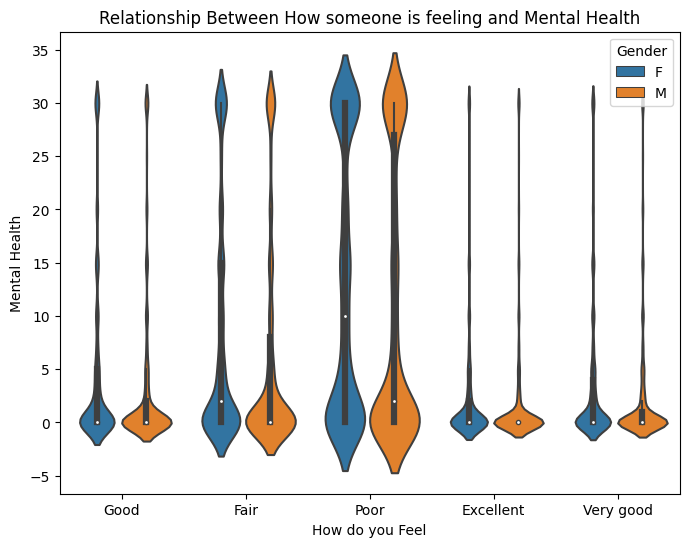

In [14]:
# Plotting a violin plot to show the relationship between how somone is feeling and mental health for gender.
plt.figure(figsize=(8, 6))
sns.violinplot(x="How do you Feel", y="Mental Health", hue='Gender', data=df)
plt.xlabel("How do you Feel")
plt.ylabel("Mental Health")
plt.title("Relationship Between How someone is feeling and Mental Health")
plt.show()

Here we calculate the percentage of people in our dataset who have Torsades de Pointes and also the percentage of people who have skin cancer. We did this to find out if these two types of diseases are frequent in our dataset. The results of our code do not show any concerns. It does not seem like either Torsades de Pointes or skin cancer is a dominant feature in our dataset.

In [17]:
df = pd.DataFrame(medcenter)

# Calculate the percentage of individuals with Torsades de Pointes (Y)
torsades_count = df["Torsades de Pointes"].value_counts()
torsades_percentage_y = (torsades_count["Y"] / len(df)) * 100

# Calculate the percentage of individuals without Torsades de Pointes (N)
torsades_percentage_n = (torsades_count["N"] / len(df)) * 100

print(f"Percentage with Torsades de Pointes (Y): {torsades_percentage_y:.2f}%")
print(f"Percentage without Torsades de Pointes (N): {torsades_percentage_n:.2f}%")


# Calculate the percentage of individuals with skin cancer (Y)
skin_cancer_count = df["Skin Cancer"].value_counts()
skin_cancer_percentage_y = (skin_cancer_count["Y"] / len(df)) * 100

# Calculate the percentage of individuals without skin cancer (N)
skin_cancer_percentage_n = (torsades_count["N"] / len(df)) * 100

print(f"Percentage with Skin Cancer (Y): {skin_cancer_percentage_y:.2f}%")
print(f"Percentage without Skin Cancer (N): {skin_cancer_percentage_n:.2f}%")


Percentage with Torsades de Pointes (Y): 10.48%
Percentage without Torsades de Pointes (N): 89.52%
Percentage with Skin Cancer (Y): 9.56%
Percentage without Skin Cancer (N): 89.52%


Here we made a barchart to see if there are any correlation between having astma and smooking. Since smooking can realy effect your lungs, we thought that there mat be a correlation. There are no weird things or suprises in this plot. There is no age group that has a much higher amount of smoking people or people with asthma. Most of the people in our dataset do not have asthma and are also not smooking,

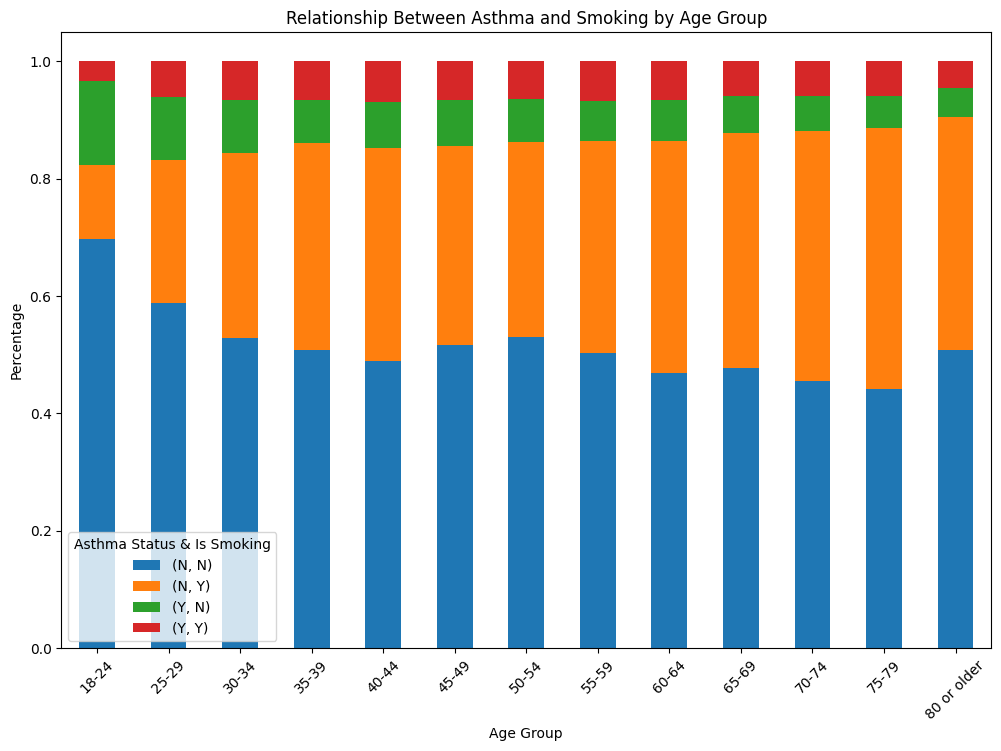

In [18]:
# Calculate the relationship between asthma and smoking by age group
cross_tab = pd.crosstab(index=df["Age Group"], columns=[df["Asthma Status"], df["Is Smoking"]], normalize='index')

# Plot the cross-tabulated data as a stacked bar chart
cross_tab.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Relationship Between Asthma and Smoking by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Asthma Status & Is Smoking")
plt.show()

We created a barchart to visualize the different bmi categories. The barchart does have some suprising results in it. We thought that there would be more people who exercise and do not have overweight or obese, but this chart shows that there a lot of people who excercise but are still obese or overweight.

Something we think that can cause this, is that maybe people who are overweight or obese need to exercise so that can be why there are more people overweight and obese but also exercise.
We also need to take into account that the percentage of people in our dataset who exercise is just alot higher than the percentage of people who do not exercise. This will of course also lead to the fact that there will be more people that are obese or overweight that also exercise since excercising is just frequent.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


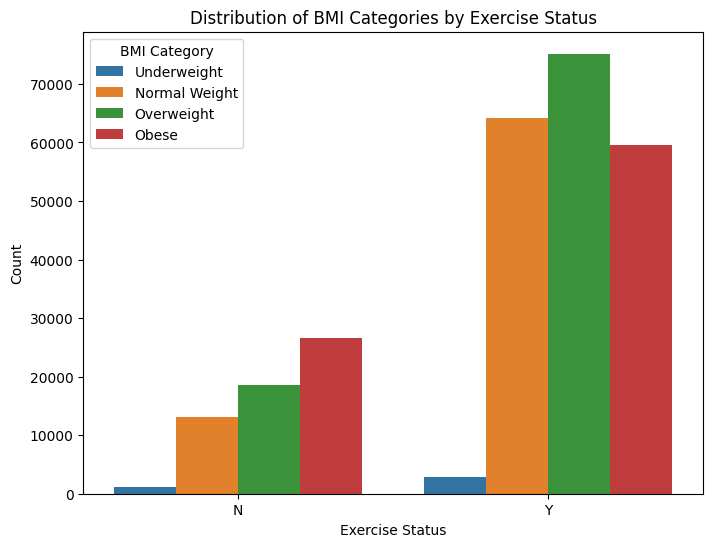

In [19]:
bmi_categories = ["Underweight", "Normal Weight", "Overweight", "Obese"]
bmi_ranges = [0, 18.5, 24.9, 29.9, 100]  # Adjust the ranges as needed

# Categorize BMI values
df['BMI Category'] = pd.cut(df['Body Mass Index'], bins=bmi_ranges, labels=bmi_categories)

# Create a bar plot to visualize the distribution of BMI categories for each exercise group
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Do you Exercise', hue='BMI Category', order=['N', 'Y'])
plt.xlabel("Exercise Status")
plt.ylabel("Count")
plt.title("Distribution of BMI Categories by Exercise Status")
plt.legend(title="BMI Category")
plt.show()

Here we made a chart to see if there is an unbalance between female and males in our dataset, because if this is the case it could have some implications for building our models. This chart shows that there is no concerning unequal distribution between how many females and males there are in the dataset. We can see that there are more females then males, but this is no concerning difference since we have such a large datafile and the difference is relatively small.

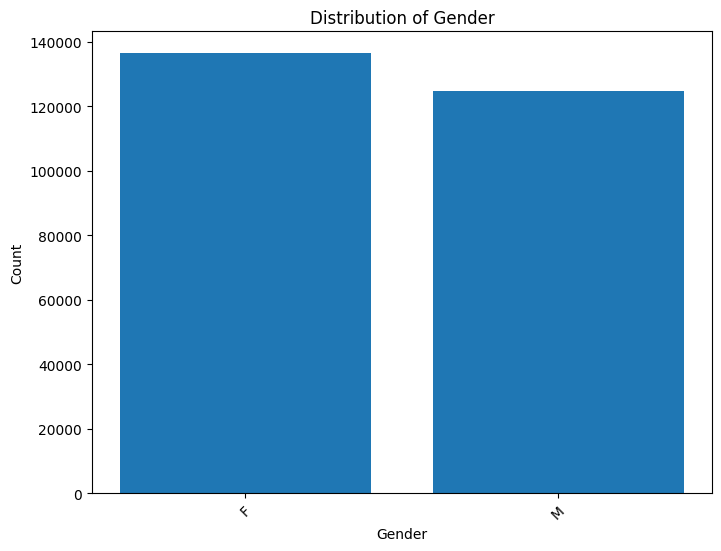

In [20]:

# Calculate counts for each Gender
counts = df['Gender'].value_counts()

# Create a bar chart for the distribution of gender
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.xticks(rotation=45)
plt.show()

Here we plotted hours of sleep and gender to see if there are any unexpected results. This barchart does not show any suprises. You can already see some outliers, but we are going to take care of those in a later phase of our project. For now we are just trying to understand our dataset and the distributions.

/var/folders/nt/4dhtctjs5rz8ztpjz_r5ddk80000gn/T/ipykernel_40532/2029915838.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=counts, x="Hours of sleep", y="Count", hue="Gender", ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated an

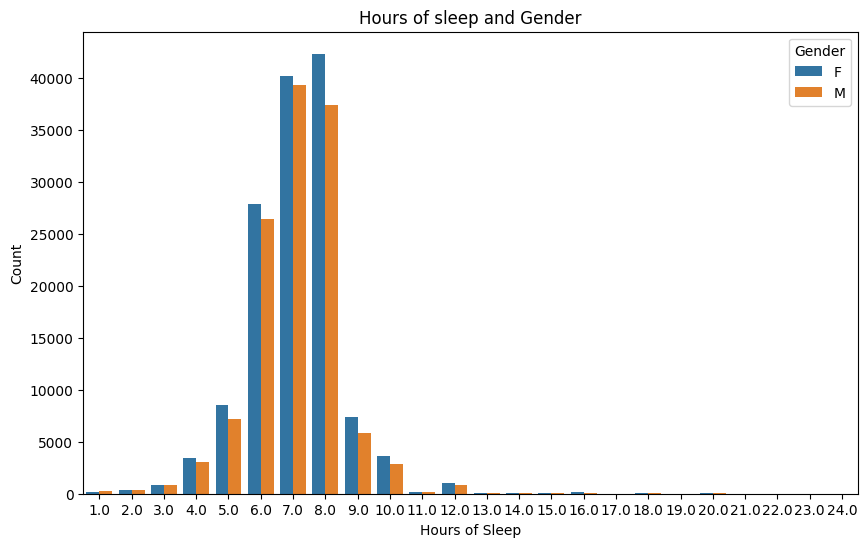

In [21]:
#Mkaing a barplot to see the distribution of hours of sleep between gender
counts = df.groupby(["Hours of sleep", "Gender"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x="Hours of sleep", y="Count", hue="Gender", ci=None)
plt.xlabel("Hours of Sleep")
plt.ylabel("Count")
plt.title("Hours of sleep and Gender")
plt.legend(title="Gender", loc="upper right")
plt.show()

This chart shows that most of the people in our dataset have an ethnicity of 'White'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'American Indian/Alaskan Native'),
  Text(5, 0, 'Asian')])

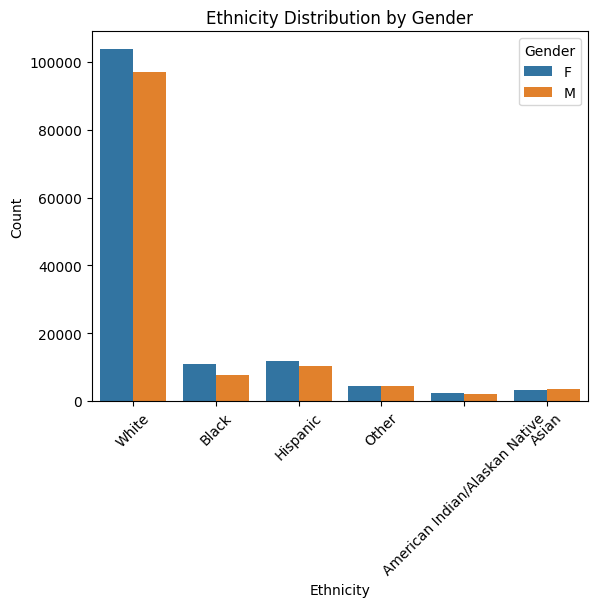

In [22]:
# Making a barchart that shows the distribution of ethnicity by gender
ethnicity_distribution = df["Ethnicity"].value_counts()
ethnicity_distribution = ethnicity_distribution.sort_values(ascending=False)
sns.countplot(data=df, x="Ethnicity", hue="Gender")
plt.title("Ethnicity Distribution by Gender")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Optional, rotate x-axis labels for better readability


/var/folders/nt/4dhtctjs5rz8ztpjz_r5ddk80000gn/T/ipykernel_40532/1415742800.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=counts, x="History of Stroke", y="Count", hue="Gender", ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated

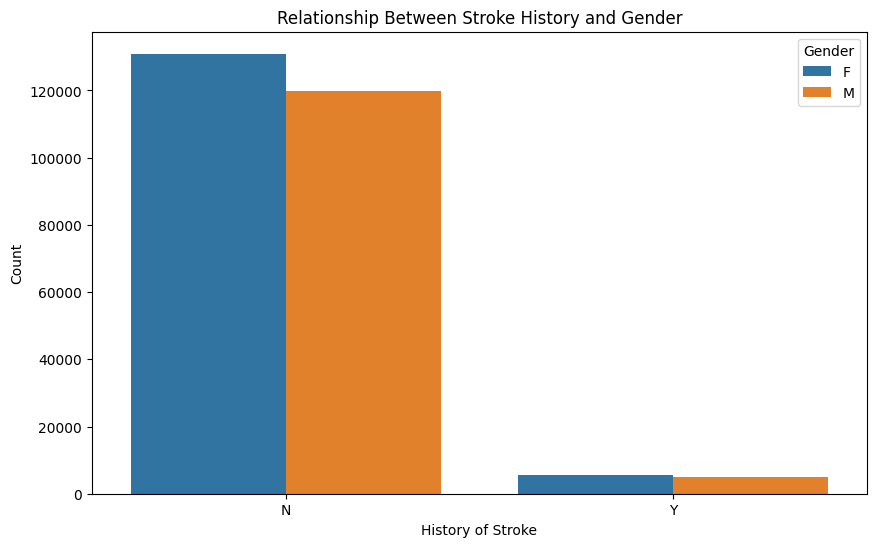

In [23]:
# Creating a barchart to see if there is a relatioship between history of stroke and gender
counts = df.groupby(["History of Stroke", "Gender"]).size().reset_index(name="Count")

# Create a grouped bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x="History of Stroke", y="Count", hue="Gender", ci=None)
plt.xlabel("History of Stroke")
plt.ylabel("Count")
plt.title("Relationship Between Stroke History and Gender")
plt.legend(title="Gender", loc="upper right")
plt.show()

Since there are so many people with a physical health of 0 and also a mental health of 0, these pairplots do not give us alot of additional insights into the data. It mostly shows us that is most likely not the case that a physical health of zero means that that person is in very bad health, otherwise you would expect to see more of a clear distribution. These pairplots are also not very useful because we have not yet encoded the categorial variables which means that they may hold relations with physical health and/or mental health that we cannot see now

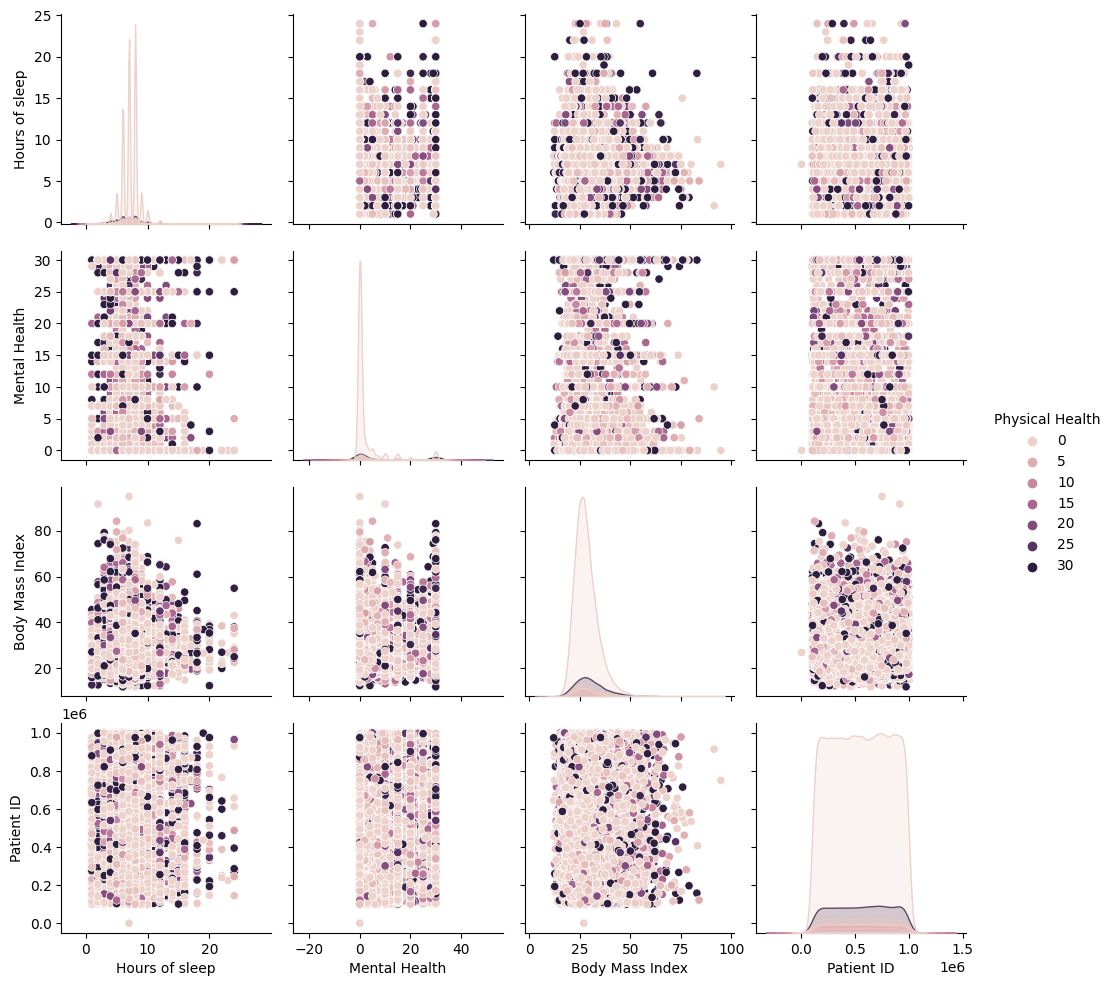

In [ ]:
sns.pairplot(df, hue='Physical Health')

plt.show()

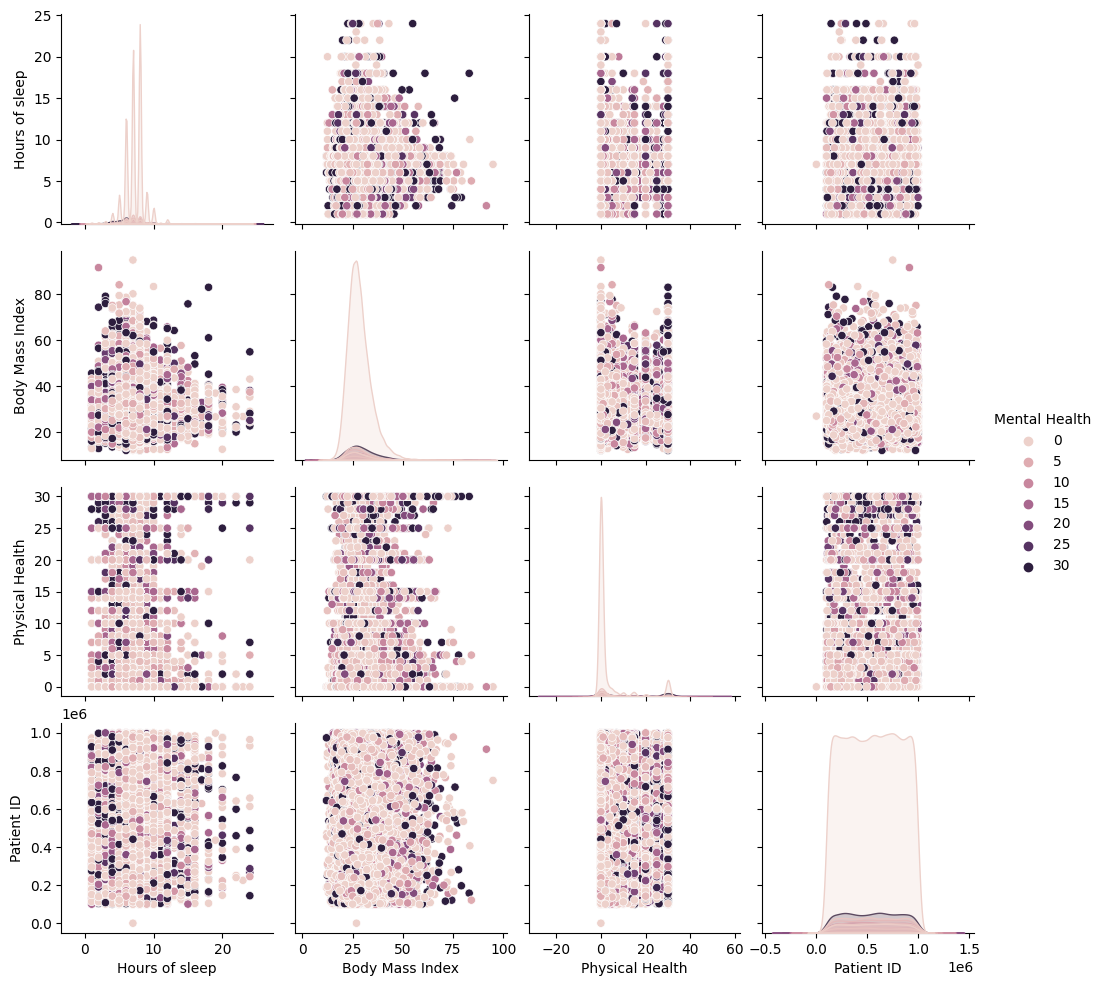

In [ ]:
sns.pairplot(df, hue='Mental Health')

plt.show()

# OneHotEncoder - Preprocessing Categorical Data

Get Dummies -- Preprocessing Categorical Data

In [25]:
df = pd.DataFrame(medcenter)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# Drop 'Patient ID', Ethnicity and BMI Category because they have no influence on the data. We also drop BMI category
# because it is no category that is supossed to be in the dataset. Only becasue we plotted it in our data visualisatio part
# did it get into the data so we need te remove it.
df = df.drop('Patient ID', axis=1)
df = df.drop('Ethnicity', axis=1)
#df = df.drop('BMI Category', axis=1)

# Specify categorical columns that we need to convert into numerical values
categorical_cols = ['Walking Difficulty', 'Torsades de Pointes', 'Skin Cancer',
                    'How do you Feel', 'How many Drinks per Week', 'Asthma Status',
                    'Do you Exercise', 'Gender', 'Kidney Disease', 'Is Smoking',
                    'Diabetes', 'History of Stroke', 'Age Group']

# Use OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
cols_out = encoder.fit_transform(df[categorical_cols])

# Create new column names for the encoded variables
new_column_names = encoder.get_feature_names_out(categorical_cols)

# Create a new DataFrame with the encoded variables
df_encoded = pd.DataFrame(cols_out, columns=new_column_names)

# Concatenate the new DataFrame with the original DataFrame (excluding categorical columns)
df = pd.concat([df.drop(categorical_cols, axis=1), df_encoded], axis=1)

# Display the modified DataFrame
print(df[:5])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Hours of sleep  Mental Health  Body Mass Index  Physical Health  \
0            10.0            0.0            15.55              7.0   
1             7.0            0.0            38.62              2.0   
2             7.0            0.0            21.62              3.0   
3             8.0            0.0            22.14              0.0   
4             8.0            0.0            43.05              0.0   

   Walking Difficulty_Y  Torsades de Pointes_Y  Skin Cancer_Y  \
0                   1.0                    1.0            0.0   
1                   0.0                    1.0            0.0   
2                   0.0                    1.0            0.0   
3                   1.0                    1.0            0.0   
4                   1.0                    1.0            0.0   

   How do you Feel_Fair  How do you Feel_Good  How do you Feel_Poor  ...  \
0                   0.0                   1.0                   0.0  ...   
1                   1.0             

In [26]:
df.head()

Hours of sleep  Mental Health  Body Mass Index  Physical Health  \
0            10.0            0.0            15.55              7.0   
1             7.0            0.0            38.62              2.0   
2             7.0            0.0            21.62              3.0   
3             8.0            0.0            22.14              0.0   
4             8.0            0.0            43.05              0.0   

   Walking Difficulty_Y  Torsades de Pointes_Y  Skin Cancer_Y  \
0                   1.0                    1.0            0.0   
1                   0.0                    1.0            0.0   
2                   0.0                    1.0            0.0   
3                   1.0                    1.0            0.0   
4                   1.0                    1.0            0.0   

   How do you Feel_Fair  How do you Feel_Good  How do you Feel_Poor  ...  \
0                   0.0                   1.0                   0.0  ...   
1                   1.0                   0.0                   0.0  ...   
2                   0.0                   1.0                   0.0  ...   
3                   0.0                   1.0                   0.0  ...   
4                   1.0                   0.0                   0.0  ...   

   Age Group_35-39  Age Group_40-44  Age Group_45-49  Age Group_50-54  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   Age Group_55-59  Age Group_60-64  Age Group_65-69  Age Group_70-74  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              1.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              0.0              1.0              0.0   
4              0.0              0.0              0.0              1.0   

   Age Group_75-79  Age Group_80 or older  
0              0.0                    1.0  
1              0.0                    0.0  
2              0.0                    0.0  
3              0.0                    0.0  
4              0.0                    0.0  

[5 rows x 33 columns]

In [27]:
df.describe()


Hours of sleep  Mental Health  Body Mass Index  Physical Health  \
count   261311.000000  261311.000000    261311.000000    261311.000000   
mean         7.099406       3.907199        28.355734         3.474951   
std          1.446752       7.969255         6.361975         8.079793   
min          1.000000       0.000000        12.020000         0.000000   
25%          6.000000       0.000000        24.030000         0.000000   
50%          7.000000       0.000000        27.350000         0.000000   
75%          8.000000       3.000000        31.470000         2.000000   
max         24.000000      30.000000        94.850000        30.000000   

       Walking Difficulty_Y  Torsades de Pointes_Y  Skin Cancer_Y  \
count         261311.000000          261311.000000  261311.000000   
mean               0.143978               0.104753       0.095576   
std                0.351068               0.306235       0.294009   
min                0.000000               0.000000       0.000000   
25%                0.000000               0.000000       0.000000   
50%                0.000000               0.000000       0.000000   
75%                0.000000               0.000000       0.000000   
max                1.000000               1.000000       1.000000   

       How do you Feel_Fair  How do you Feel_Good  How do you Feel_Poor  ...  \
count         261311.000000         261311.000000         261311.000000  ...   
mean               0.111591              0.291806              0.037668  ...   
std                0.314863              0.454594              0.190392  ...   
min                0.000000              0.000000              0.000000  ...   
25%                0.000000              0.000000              0.000000  ...   
50%                0.000000              0.000000              0.000000  ...   
75%                0.000000              1.000000              0.000000  ...   
max                1.000000              1.000000              1.000000  ...   

       Age Group_35-39  Age Group_40-44  Age Group_45-49  Age Group_50-54  \
count    261311.000000    261311.000000    261311.000000    261311.000000   
mean          0.063246         0.064574         0.067173         0.078229   
std           0.243406         0.245774         0.250322         0.268532   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       Age Group_55-59  Age Group_60-64  Age Group_65-69  Age Group_70-74  \
count    261311.000000    261311.000000    261311.000000    261311.000000   
mean          0.093199         0.106111         0.107925         0.098932   
std           0.290712         0.307980         0.310286         0.298571   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       Age Group_75-79  Age Group_80 or older  
count    261311.000000          261311.000000  
mean          0.068991               0.077972  
std           0.253439               0.268128  
min           0.000000               0.000000  
25%           0.000000               0.000000  
50%           0.000000               0.000000  
75%           0.000000               0.000000  
max           1.000000               1.000000  

[8 rows x 33 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261311 entries, 0 to 261310
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Hours of sleep                    261311 non-null  float64
 1   Mental Health                     261311 non-null  float64
 2   Body Mass Index                   261311 non-null  float64
 3   Physical Health                   261311 non-null  float64
 4   Walking Difficulty_Y              261311 non-null  float64
 5   Torsades de Pointes_Y             261311 non-null  float64
 6   Skin Cancer_Y                     261311 non-null  float64
 7   How do you Feel_Fair              261311 non-null  float64
 8   How do you Feel_Good              261311 non-null  float64
 9   How do you Feel_Poor              261311 non-null  float64
 10  How do you Feel_Very good         261311 non-null  float64
 11  How many Drinks per Week_Y        261311 non-null  f

As you can see are all our variables floats. This is needed in order to work with them in for example calculating correlations but also to make our model. We used One-hot encoding. By using this way to encode our variables, we created a new binary variable for each category. Each binary variable equals 1 if the sample belongs to the corresponding category. If this is not the case, the variable will be o. As you can see, we created four new binary variables to encode the categorial variable "How do you feel". If a sample has as categorial variable "Poor" It will have a value of 1 in the new binary variable "How do you Feel_Poor" and the other 3 will be equal to 0.

## Removing the Outliers

In order to see if there are outliers, we used boxplots. It shows the median, interquartile Range (which shows 50% of the data) and the whiskers (which extend from the boxes to illustrate the range of the data, this is typically 1.5 times the IQR from the quartiles). You can see if there are outliers because those typically are the
data points that lie beyond the whiskers and are plotted individually.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


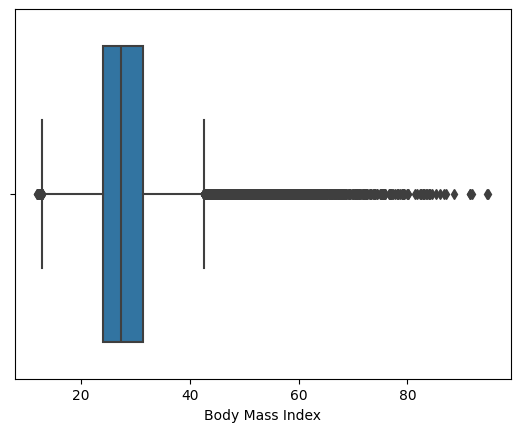

In [29]:
sns.boxplot(x=df['Body Mass Index'])
plt.show()

This bocplot shows that there are a lot of outliers for body max index

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


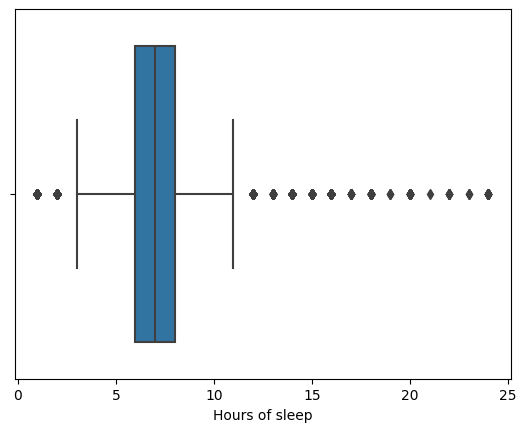

In [30]:
sns.boxplot(x=df['Hours of sleep'])
plt.show()

This boxplot shows that there are also outliers for hours of sleep. It does not seem accurate that someone can sleep for more that 15 hours a day

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


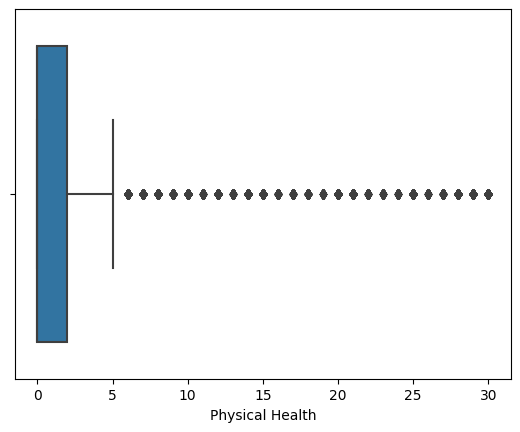

In [31]:
sns.boxplot(x=df['Physical Health'])
plt.show()

As more than 60% of the Physical health values are 0, this boxplot makes it look like the other values are outliers but this is most likely not the case. We are going to look further into the dataset to find out what the zeros for physical health mean.


We are going to take a better look at why there are so many zeros in our physical health colum

The number of people with a physical health score of 0 and walking difficulty is: 13585
The percentage of people with a Physical health score of 0 and walking difficulty: 5.2%


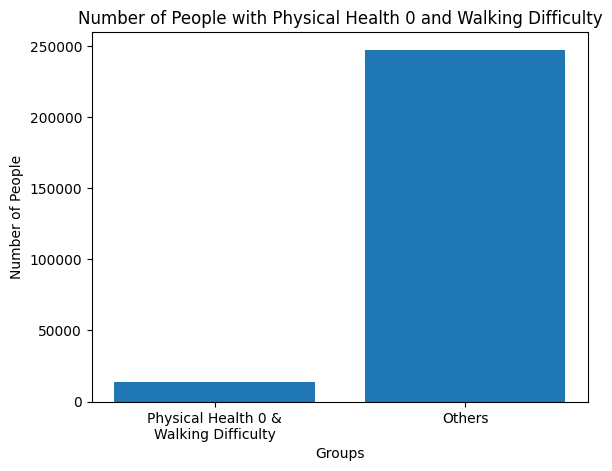

In [32]:
import matplotlib.pyplot as plt
filtered_data = df[(df['Physical Health'] == 0) & (df['Walking Difficulty_Y'] == 1)]
count_of_people = len(filtered_data)

#Calculating how many people exacly have a physical health score of 0 and walking difficulty:
print(f"The number of people with a physical health score of 0 and walking difficulty is: {count_of_people}")
print(f"The percentage of people with a Physical health score of 0 and walking difficulty: {round((count_of_people/len(df))*100, 1)}%")

# Create a bar chart
plt.bar(['Physical Health 0 &\nWalking Difficulty', 'Others'], [count_of_people, len(df) - count_of_people])

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Number of People')
plt.title('Number of People with Physical Health 0 and Walking Difficulty')

# Show the plot
plt.show()

This gives us more insight in our dataset. You would expect that people with low physical heath would have more frequently a walking difficult, because walking difficulty is something which you would expect to interfere with someone's physical health. So if a Physical health of 0 would indicate that that person has a terrible physical health, they would have a higher change of having a walking difficulty. This graph shows that there are very little people in our dataset that have a physical health of 0 and a walking difficulty. This gives us a clear indication that a score of 0 means something else

Now lets see if that is the same for mental health.

The number of people with a Mental health score of 0 and feel poor: 3890
The percentage of people with a Mental health score of 0 and feel poor: 1.5%


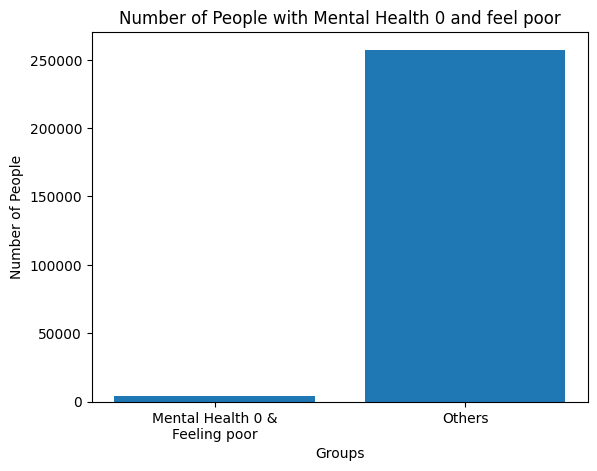

In [33]:
import matplotlib.pyplot as plt
filtered_data = df[(df['Mental Health'] == 0) & (df['How do you Feel_Poor'] == 1)]
count_of_people = len(filtered_data)

#Calculate how many people exactly have a Mental health score of 0 and feel poor
print(f"The number of people with a Mental health score of 0 and feel poor: {count_of_people}")
print(f"The percentage of people with a Mental health score of 0 and feel poor: {round((count_of_people/len(df))*100, 1)}%")


# Create a bar chart
plt.bar(['Mental Health 0 &\nFeeling poor', 'Others'], [count_of_people, len(df) - count_of_people])

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Number of People')
plt.title('Number of People with Mental Health 0 and feel poor')

# Show the plot
plt.show()

This is the same situation as the physical health problem. If a mental health of 0 would indicate that someone is in very bad mental heath, you would expect that they also feel poor. This chart shows that only 1.5% of the people who have a mental health score of 0 also feel poor.

In [34]:
percentage_zero_mental_health = (df['Mental Health'] == 0).mean() * 100

# Print the result
print(f"The percentage of people with 0 in their Mental Health is: {percentage_zero_mental_health:.2f}%")

The percentage of people with 0 in their Mental Health is: 64.25%


After some discussions and looking at the data, we found out that the 0 are most of the time an indication of perfect physical health. So if someone has zero physical health it means that they are in perfect physical condition and that there are no problems with their physical health. The only issue we had was how to explain the small amount of cases when someone has a physical health of 0 and also walking difficulty. We came to the conlusion that the best thing to do is, is treating those as missing values. This means that we are going to delete the data for poeple who have a 0 for physical health and also have some other type of disease or condition that would interfere with their physical health. To make our correlations better, we are also going to change all the other values of 0 to 31 to make it more locially. We are going to do the same thing for mental health but then with all the values that could intere with someones mental health

# Filtering Data

In [35]:
import pandas as pd

column_bmi = 'Body Mass Index'
column_sleep = 'Hours of sleep'
# Filter outliers for 'Body Mass Index'
Q1_bmi = df[column_bmi].quantile(0.25)
Q3_bmi = df[column_bmi].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Filter outliers for 'Hours of sleep'
Q1_sleep = df[column_sleep].quantile(0.25)
Q3_sleep = df[column_sleep].quantile(0.75)
IQR_sleep = Q3_sleep - Q1_sleep
lower_bound_sleep = Q1_sleep - 1.5 * IQR_sleep
upper_bound_sleep = Q3_sleep + 1.5 * IQR_sleep

# Filter outliers for body mass index and hours of sleep
result = df[
    (df['Body Mass Index'] >= lower_bound_bmi) & (df['Body Mass Index'] <= upper_bound_bmi) &
    (df['Hours of sleep'] >= lower_bound_sleep) & (df['Hours of sleep'] <= upper_bound_sleep) ]


filter = result[
    ~((result['Physical Health'] == 0) &
      (
        (result['Torsades de Pointes_Y'] == 1) |
        (result['Skin Cancer_Y'] == 1) |
        (result['Asthma Status_Y'] == 1) |
        (result['Do you Exercise_Y'] == 1) |
        (result['Kidney Disease_Y'] == 1) |
        (result['Is Smoking_Y'] == 1) |
        (result['History of Stroke_Y'] == 1)
      )
    )
]



filter2 = filter[~(filter['Mental Health'] == 0.0)]

#We choose to remove all instances of mental health of 0 because we found it hard te find the cases in which people have a mental health of
# 0 and this is an indication of a missing value. What influences someone's mental health? Since we could not answer this question, we
# deleted all the mental health values of 0.

final_data = filter2


print(final_data[:5])
final_data.describe()

    Hours of sleep  Mental Health  Body Mass Index  Physical Health  \
7              7.0           10.0            32.12             15.0   
10             8.0           15.0            30.79             30.0   
18             8.0           15.0            29.99             15.0   
20             7.0            3.0            28.89              1.0   
31             8.0           12.0            26.85              2.0   

    Walking Difficulty_Y  Torsades de Pointes_Y  Skin Cancer_Y  \
7                    0.0                    1.0            0.0   
10                   1.0                    1.0            1.0   
18                   1.0                    1.0            0.0   
20                   1.0                    1.0            0.0   
31                   0.0                    1.0            0.0   

    How do you Feel_Fair  How do you Feel_Good  How do you Feel_Poor  ...  \
7                    0.0                   1.0                   0.0  ...   
10                   1

Hours of sleep  Mental Health  Body Mass Index  Physical Health  \
count    41058.000000   41058.000000     41058.000000     41058.000000   
mean         6.748770      12.482854        28.339827        10.823640   
std          1.469018      10.492598         5.804564        10.997155   
min          3.000000       1.000000        12.920000         0.000000   
25%          6.000000       3.000000        24.020000         2.000000   
50%          7.000000      10.000000        27.620000         5.000000   
75%          8.000000      20.000000        32.280000        20.000000   
max         11.000000      30.000000        42.620000        30.000000   

       Walking Difficulty_Y  Torsades de Pointes_Y  Skin Cancer_Y  \
count          41058.000000           41058.000000   41058.000000   
mean               0.286059               0.136587       0.082615   
std                0.451923               0.343415       0.275303   
min                0.000000               0.000000       0.000000   
25%                0.000000               0.000000       0.000000   
50%                0.000000               0.000000       0.000000   
75%                1.000000               0.000000       0.000000   
max                1.000000               1.000000       1.000000   

       How do you Feel_Fair  How do you Feel_Good  How do you Feel_Poor  ...  \
count          41058.000000          41058.000000          41058.000000  ...   
mean               0.240854              0.321716              0.115690  ...   
std                0.427607              0.467140              0.319857  ...   
min                0.000000              0.000000              0.000000  ...   
25%                0.000000              0.000000              0.000000  ...   
50%                0.000000              0.000000              0.000000  ...   
75%                0.000000              1.000000              0.000000  ...   
max                1.000000              1.000000              1.000000  ...   

       Age Group_35-39  Age Group_40-44  Age Group_45-49  Age Group_50-54  \
count     41058.000000     41058.000000     41058.000000     41058.000000   
mean          0.069414         0.068415         0.072946         0.086244   
std           0.254160         0.252460         0.260050         0.280727   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       Age Group_55-59  Age Group_60-64  Age Group_65-69  Age Group_70-74  \
count     41058.000000     41058.000000     41058.000000     41058.000000   
mean          0.101978         0.107117         0.092844         0.078377   
std           0.302623         0.309265         0.290218         0.268767   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       Age Group_75-79  Age Group_80 or older  
count     41058.000000           41058.000000  
mean          0.049978               0.049783  
std           0.217902               0.217499  
min           0.000000               0.000000  
25%           0.000000               0.000000  
50%           0.000000               0.000000  
75%           0.000000               0.000000  
max           1.000000               1.000000  

[8 rows x 33 columns]

In [36]:
# Find the maximum value in the 'Hours of sleep' column
max_hours_of_sleep = final_data['Hours of sleep'].max()

# Print the result
print(f"The maximum hours of sleep is: {max_hours_of_sleep}")

The maximum hours of sleep is: 11.0


In [38]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249484 entries, 0 to 261309
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Hours of sleep                    249484 non-null  float64
 1   Mental Health                     249484 non-null  float64
 2   Body Mass Index                   249484 non-null  float64
 3   Physical Health                   249484 non-null  float64
 4   Walking Difficulty_Y              249484 non-null  float64
 5   Torsades de Pointes_Y             249484 non-null  float64
 6   Skin Cancer_Y                     249484 non-null  float64
 7   How do you Feel_Fair              249484 non-null  float64
 8   How do you Feel_Good              249484 non-null  float64
 9   How do you Feel_Poor              249484 non-null  float64
 10  How do you Feel_Very good         249484 non-null  float64
 11  How many Drinks per Week_Y        249484 non-null  float6

In [39]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41058 entries, 7 to 261279
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours of sleep                    41058 non-null  float64
 1   Mental Health                     41058 non-null  float64
 2   Body Mass Index                   41058 non-null  float64
 3   Physical Health                   41058 non-null  float64
 4   Walking Difficulty_Y              41058 non-null  float64
 5   Torsades de Pointes_Y             41058 non-null  float64
 6   Skin Cancer_Y                     41058 non-null  float64
 7   How do you Feel_Fair              41058 non-null  float64
 8   How do you Feel_Good              41058 non-null  float64
 9   How do you Feel_Poor              41058 non-null  float64
 10  How do you Feel_Very good         41058 non-null  float64
 11  How many Drinks per Week_Y        41058 non-null  float64
 12  Asthma S

In [40]:
final_data.head()

Hours of sleep  Mental Health  Body Mass Index  Physical Health  \
7              7.0           10.0            32.12             15.0   
10             8.0           15.0            30.79             30.0   
18             8.0           15.0            29.99             15.0   
20             7.0            3.0            28.89              1.0   
31             8.0           12.0            26.85              2.0   

    Walking Difficulty_Y  Torsades de Pointes_Y  Skin Cancer_Y  \
7                    0.0                    1.0            0.0   
10                   1.0                    1.0            1.0   
18                   1.0                    1.0            0.0   
20                   1.0                    1.0            0.0   
31                   0.0                    1.0            0.0   

    How do you Feel_Fair  How do you Feel_Good  How do you Feel_Poor  ...  \
7                    0.0                   1.0                   0.0  ...   
10                   1.0                   0.0                   0.0  ...   
18                   0.0                   1.0                   0.0  ...   
20                   0.0                   0.0                   0.0  ...   
31                   0.0                   0.0                   0.0  ...   

    Age Group_35-39  Age Group_40-44  Age Group_45-49  Age Group_50-54  \
7               0.0              0.0              0.0              0.0   
10              0.0              0.0              0.0              0.0   
18              0.0              0.0              0.0              0.0   
20              0.0              0.0              0.0              0.0   
31              0.0              0.0              0.0              0.0   

    Age Group_55-59  Age Group_60-64  Age Group_65-69  Age Group_70-74  \
7               0.0              0.0              0.0              1.0   
10              0.0              0.0              0.0              0.0   
18              1.0              0.0              0.0              0.0   
20              0.0              0.0              1.0              0.0   
31              0.0              0.0              1.0              0.0   

    Age Group_75-79  Age Group_80 or older  
7               0.0                    0.0  
10              1.0                    0.0  
18              0.0                    0.0  
20              0.0                    0.0  
31              0.0                    0.0  

[5 rows x 33 columns]

Now let's take a look to see how removing the missing values of physical health have changed the amount of zero's in our physical health variable. As you can see do only 5.08% of the people now have a 0 as physical health which gives a much better distribution. This is also visable in the piechart.

In [41]:
percentage_zero_physical_health = (final_data['Physical Health'] == 0).mean() * 100

# Print the result
print(f"The percentage of people with 0 in their Physical Health is: {percentage_zero_physical_health:.2f}%")

The percentage of people with 0 in their Physical Health is: 6.90%


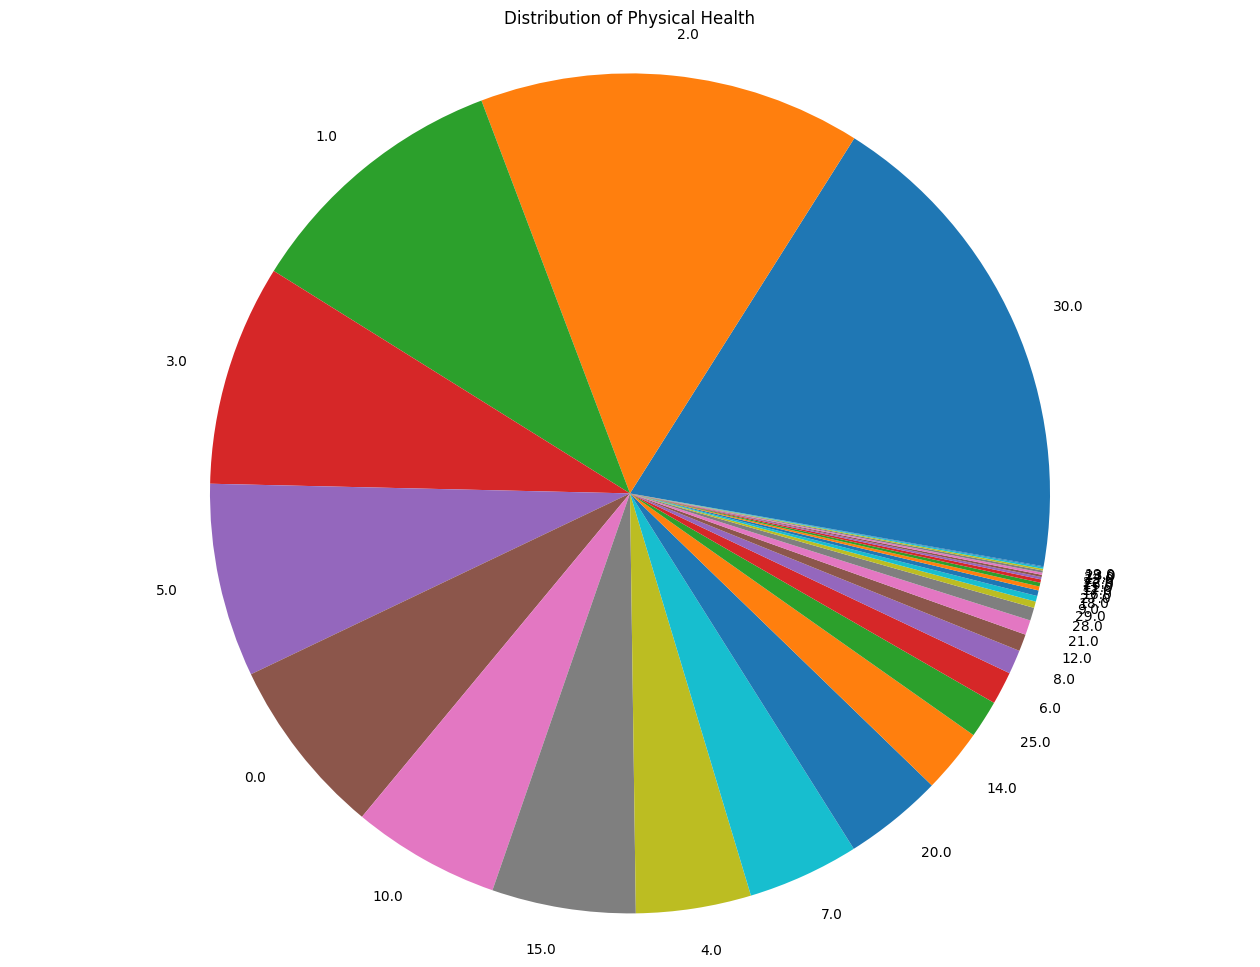

In [42]:
# Calculate counts for each Physical health category
counts = final_data['Physical Health'].value_counts()

# Create a pie chart for Physical health
plt.figure(figsize=(16, 12))
plt.pie(counts, labels=counts.index, startangle=350)
plt.axis('equal')
plt.title("Distribution of Physical Health")
plt.show()

Here we checked if we indeed removed all the zeros in mental health. As you can see, we have no longer people with 0 mental health

In [43]:
percentage_zero_physical_health = (final_data['Mental Health'] == 0).mean() * 100

# Print the result
print(f"The percentage of people with 0 in their Mental Health is: {percentage_zero_physical_health:.2f}%")

The percentage of people with 0 in their Mental Health is: 0.00%


# Correlation After Filtering

Now we are going to look at different correlations betwen the variables of our dataset.

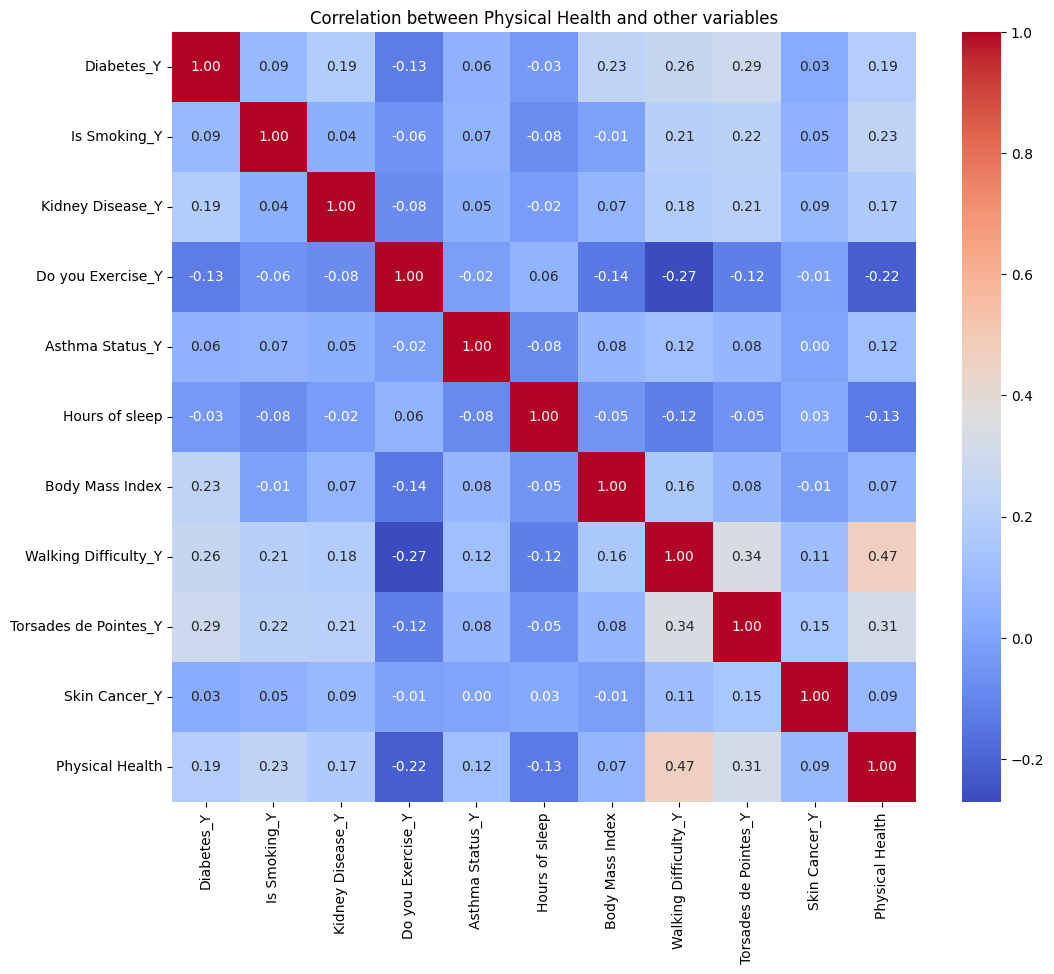

In [ ]:
#Choose which variables to use in the heatmap
Important_Variables= ['Diabetes_Y' , 'Is Smoking_Y','Kidney Disease_Y', 'Do you Exercise_Y','Asthma Status_Y', 'Hours of sleep','Body Mass Index',  'Walking Difficulty_Y', 'Torsades de Pointes_Y', 'Skin Cancer_Y','Physical Health']

# Select the relevant columns from the DataFrame
CorrelationMatrix_ImpartantVariables = final_data[Important_Variables]

correlation_matrix = CorrelationMatrix_ImpartantVariables.corr()
fig, ax = plt.subplots(figsize=(12, 10))

#Vizualisation
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_title('Correlation between Physical Health and other variables')
plt.show()

# TEST AND TRAINING DATA

In [44]:
from sklearn.model_selection import train_test_split
X = final_data.drop("Physical Health", axis=1)
y = final_data["Physical Health"]

# Shuffle the data
data = final_data.sample(frac=1, random_state=42)

# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Checking the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32846, 32)
X_test shape: (8212, 32)
y_train shape: (32846,)
y_test shape: (8212,)


In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_val shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_test.shape)

X_train shape: (26276, 32)
X_val shape: (8212, 32)
y_train shape: (26276,)
y_val shape: (8212,)


In [ ]:
corr = X_train.corr()
corr

Hours of sleep  Mental Health  \
Hours of sleep                          1.000000      -0.177242   
Mental Health                          -0.177242       1.000000   
Body Mass Index                        -0.041143       0.021500   
Walking Difficulty_Y                   -0.107508       0.210083   
Torsades de Pointes_Y                  -0.041626       0.120595   
Skin Cancer_Y                           0.024035       0.010437   
How do you Feel_Fair                   -0.062507       0.111660   
How do you Feel_Good                    0.042356      -0.121283   
How do you Feel_Poor                   -0.084564       0.254315   
How do you Feel_Very good               0.070831      -0.167855   
How many Drinks per Week_Y             -0.001216       0.031503   
Asthma Status_Y                        -0.079820       0.087972   
Do you Exercise_Y                       0.058646      -0.141541   
Gender_M                               -0.020797      -0.013044   
Kidney Disease_Y                       -0.015147       0.078927   
Is Smoking_Y                           -0.075009       0.145280   
Diabetes_No, borderline diabetes        0.001142       0.011921   
Diabetes_Y                             -0.020291       0.057506   
Diabetes_Yes (during pregnancy)        -0.016935       0.001445   
History of Stroke_Y                    -0.027104       0.092631   
Age Group_25-29                         0.009554      -0.019349   
Age Group_30-34                        -0.014854      -0.027051   
Age Group_35-39                        -0.045016      -0.010025   
Age Group_40-44                        -0.039667       0.003908   
Age Group_45-49                        -0.046437       0.018315   
Age Group_50-54                        -0.065834       0.043761   
Age Group_55-59                        -0.048840       0.037737   
Age Group_60-64                        -0.037870       0.032349   
Age Group_65-69                         0.014334      -0.005820   
Age Group_70-74                         0.064621      -0.025383   
Age Group_75-79                         0.069620      -0.022792   
Age Group_80 or older                   0.084516      -0.023542   

                                  Body Mass Index  Walking Difficulty_Y  \
Hours of sleep                          -0.041143             -0.107508   
Mental Health                            0.021500              0.210083   
Body Mass Index                          1.000000              0.163015   
Walking Difficulty_Y                     0.163015              1.000000   
Torsades de Pointes_Y                    0.083581              0.340151   
Skin Cancer_Y                           -0.016090              0.111761   
How do you Feel_Fair                     0.080727              0.191543   
How do you Feel_Good                     0.028200             -0.156413   
How do you Feel_Poor                     0.047263              0.362425   
How do you Feel_Very good               -0.097538             -0.286158   
How many Drinks per Week_Y              -0.070724             -0.051345   
Asthma Status_Y                          0.073773              0.115687   
Do you Exercise_Y                       -0.141480             -0.273725   
Gender_M                                 0.002194             -0.025194   
Kidney Disease_Y                         0.079704              0.182543   
Is Smoking_Y                            -0.007603              0.205261   
Diabetes_No, borderline diabetes         0.052410              0.019807   
Diabetes_Y                               0.248842              0.254915   
Diabetes_Yes (during pregnancy)          0.007365             -0.024308   
History of Stroke_Y                      0.022428              0.221173   
Age Group_25-29                         -0.043046             -0.150218   
Age Group_30-34                         -0.024275             -0.125349   
Age Group_35-39                          0.015730             -0.118857   
Age Group_40-44       

<Axes: >

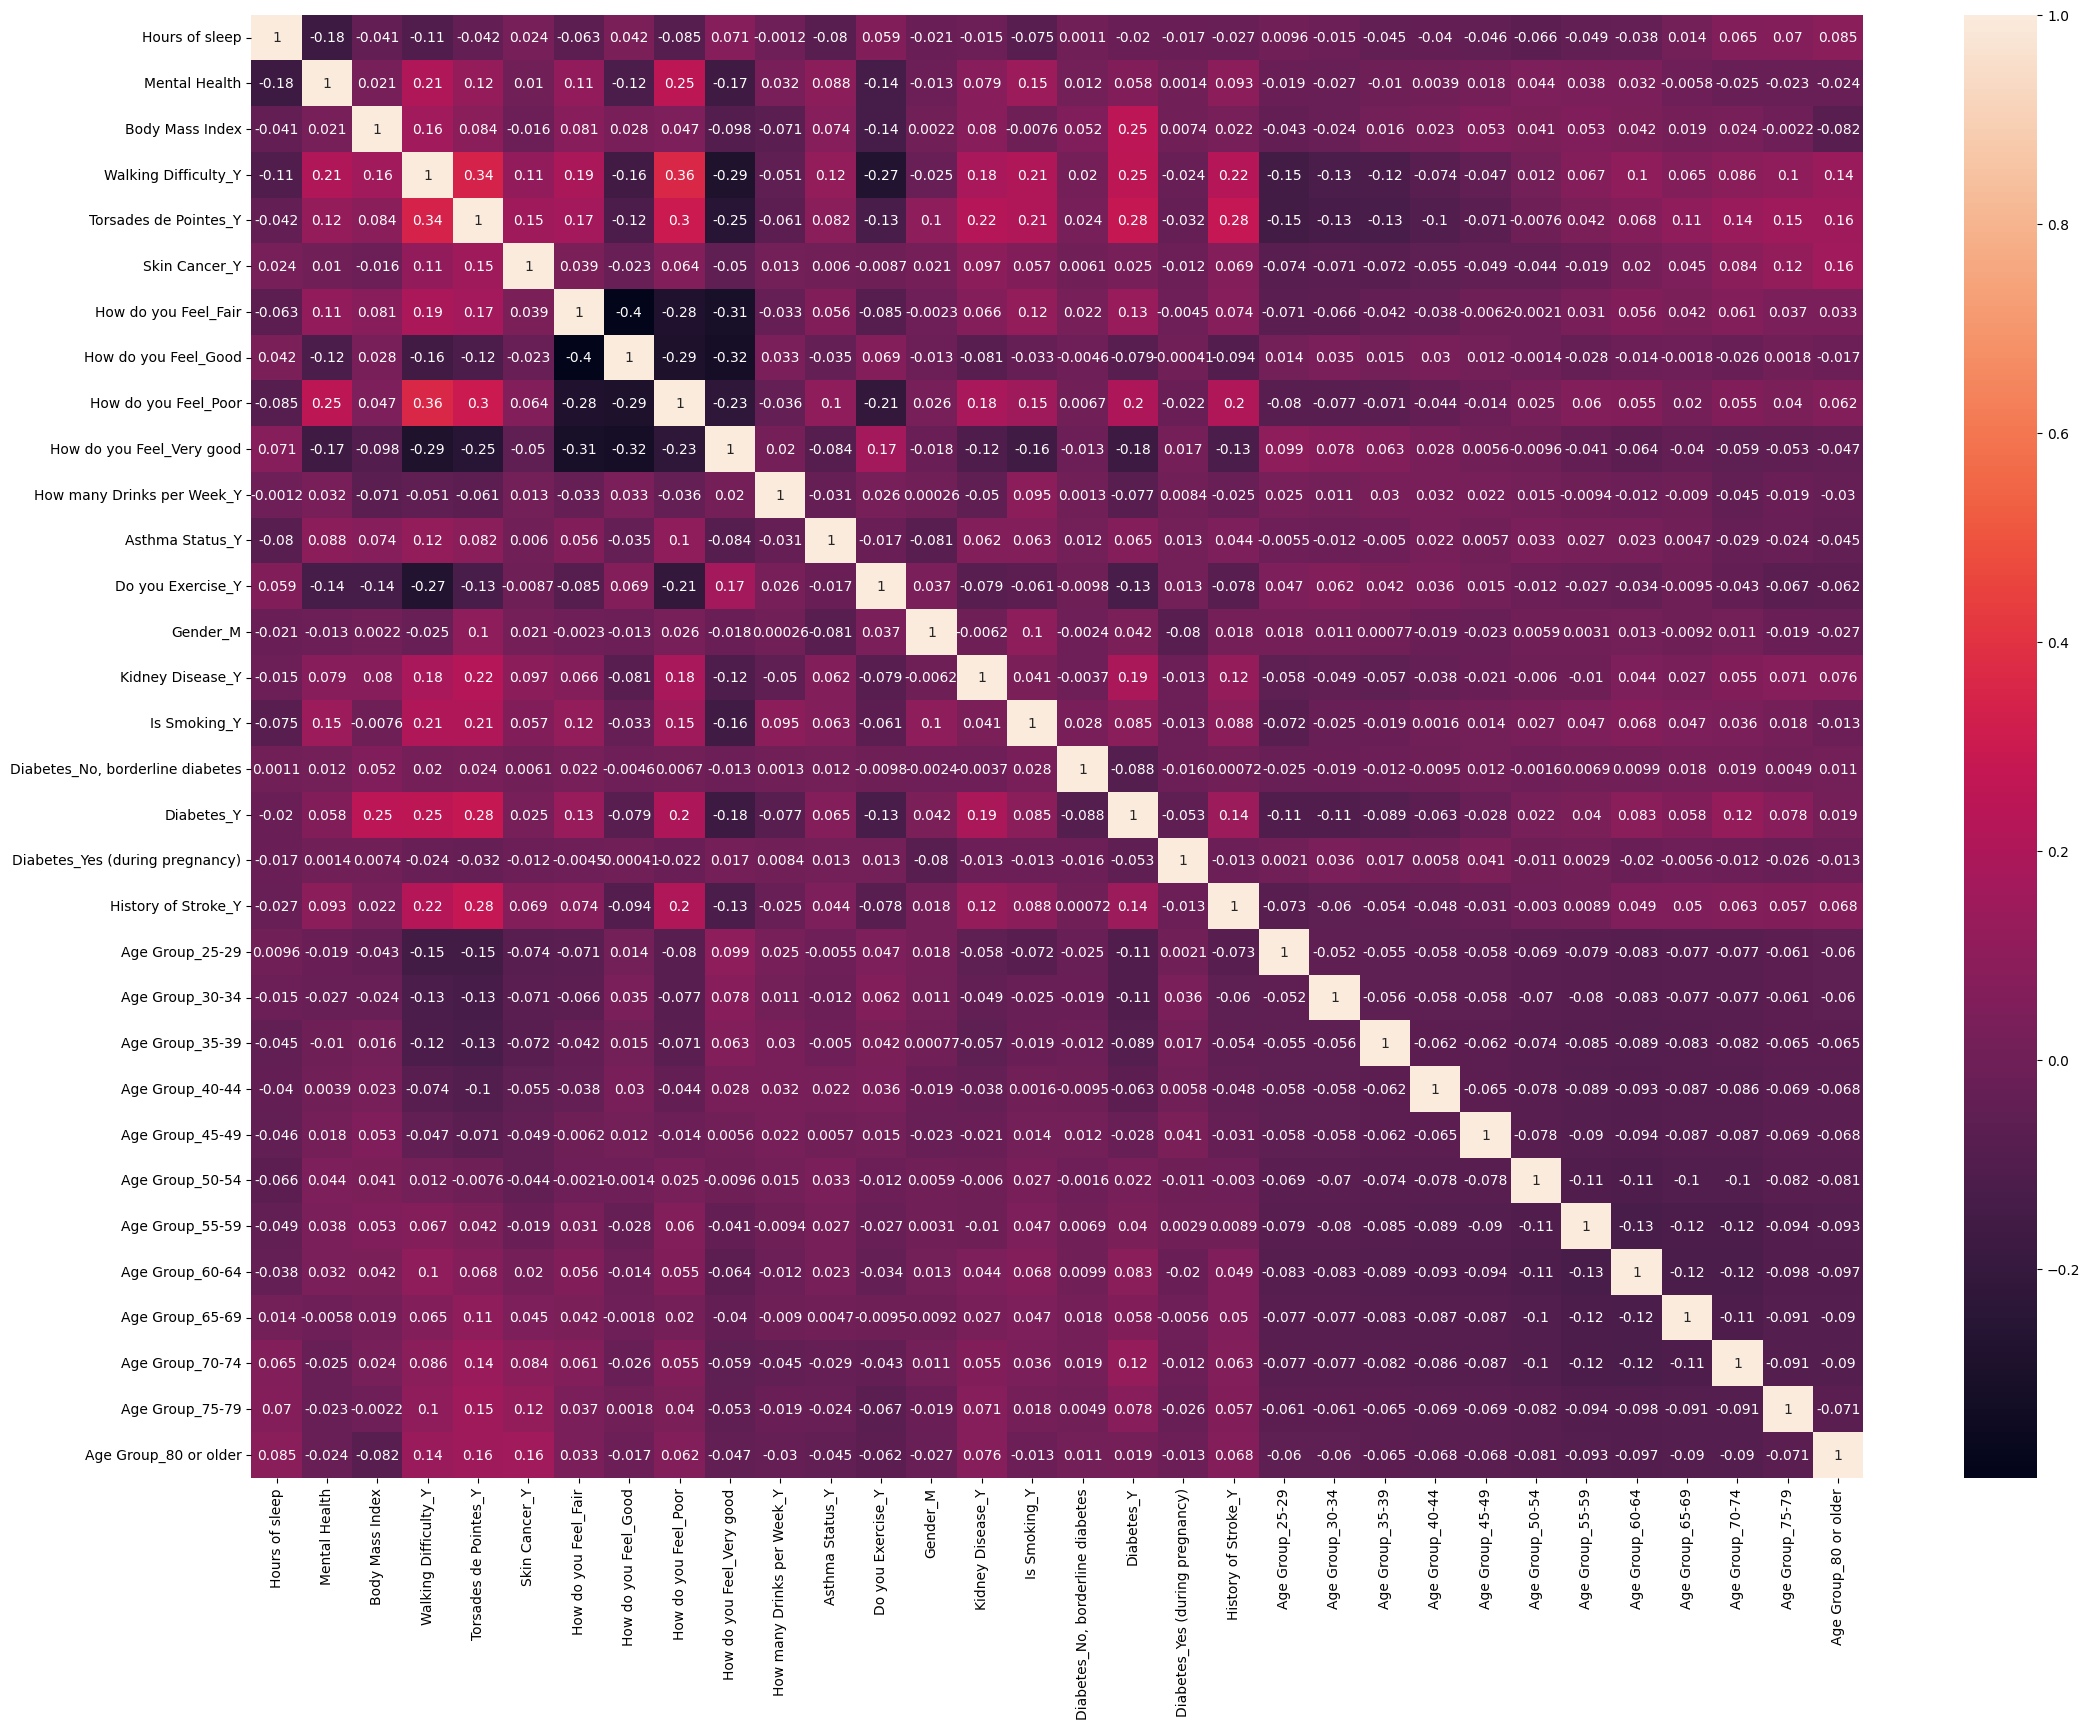

In [ ]:
#Making a headmap with all the correlations in the trainset
plt.figure(figsize=(26,19))
sns.heatmap(corr ,annot=True)

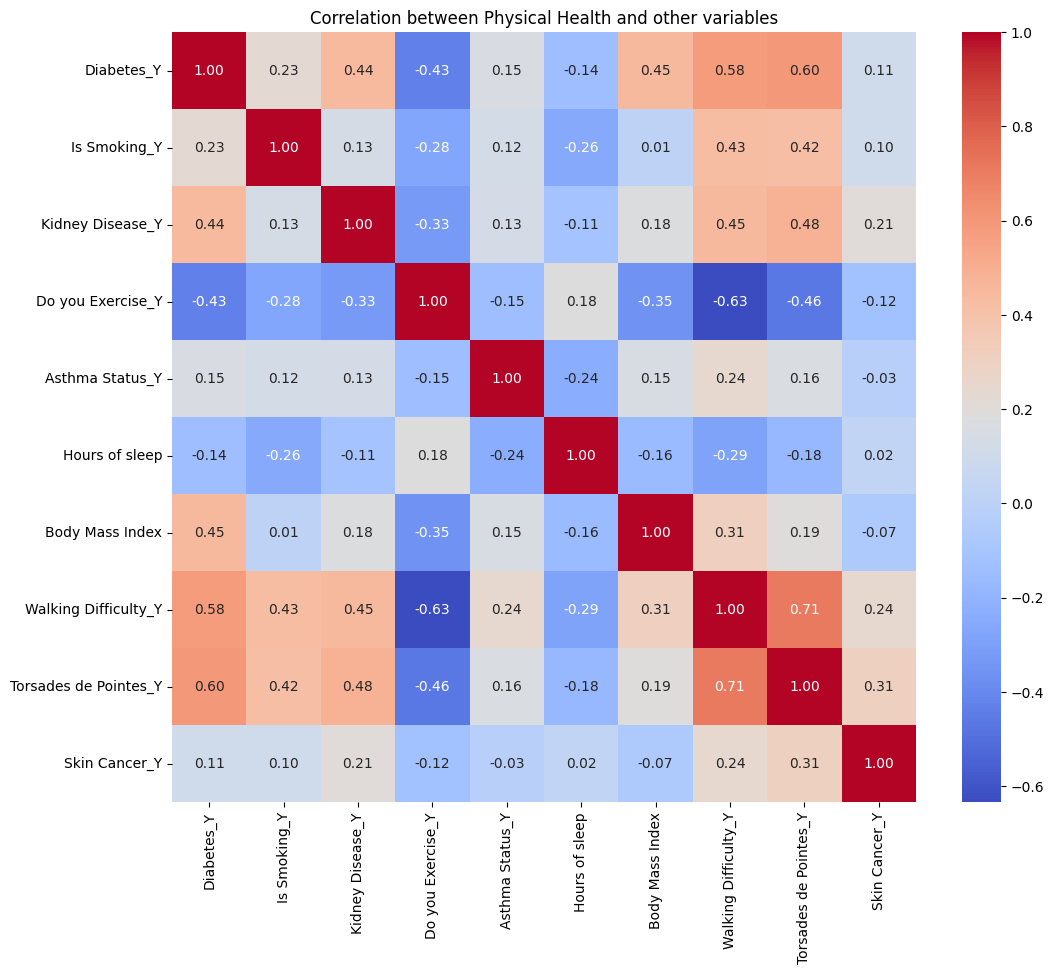

In [ ]:
#Making a headmap to show the correlations in our final dataset. This can also be used to look for multicollinearity
Important_Variables= ['Diabetes_Y' , 'Is Smoking_Y','Kidney Disease_Y', 'Do you Exercise_Y','Asthma Status_Y', 'Hours of sleep','Body Mass Index',  'Walking Difficulty_Y', 'Torsades de Pointes_Y', 'Skin Cancer_Y']

# Select the relevant columns from the DataFrame
CorrelationMatrix_ImpartantVariables = corr[Important_Variables]

correlation_matrix = CorrelationMatrix_ImpartantVariables.corr()
fig, ax = plt.subplots(figsize=(12, 10))

#Vizualisation
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_title('Correlation between Physical Health and other variables')
plt.show()

## Standard Scaler

We use standard scaler in our preprocessing because it transforms the features such that they have a mean of 0 and a standard deviation of 1. This ensures that the features are on a similar scale, preventing some features from dominating others during the modeling process.

In [46]:
# import and use StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [47]:
X_train_scaled

array([[-0.50879809,  0.24146127,  0.76056943, ..., -0.29227779,
        -0.23117493, -0.22786754],
       [ 0.85324956, -0.52087469, -1.58413198, ..., -0.29227779,
        -0.23117493, -0.22786754],
       [ 0.17222573, -0.71145868, -0.61897139, ..., -0.29227779,
        -0.23117493, -0.22786754],
       ...,
       [ 0.17222573,  0.14616927, -0.34271791, ..., -0.29227779,
         4.32572861, -0.22786754],
       [ 0.85324956, -1.09262666, -0.22876335, ..., -0.29227779,
        -0.23117493,  4.38851448],
       [ 0.85324956,  1.67084119,  0.74503017, ...,  3.42140266,
        -0.23117493, -0.22786754]])

As you can see in the boxplots, the features are now on the same scale

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

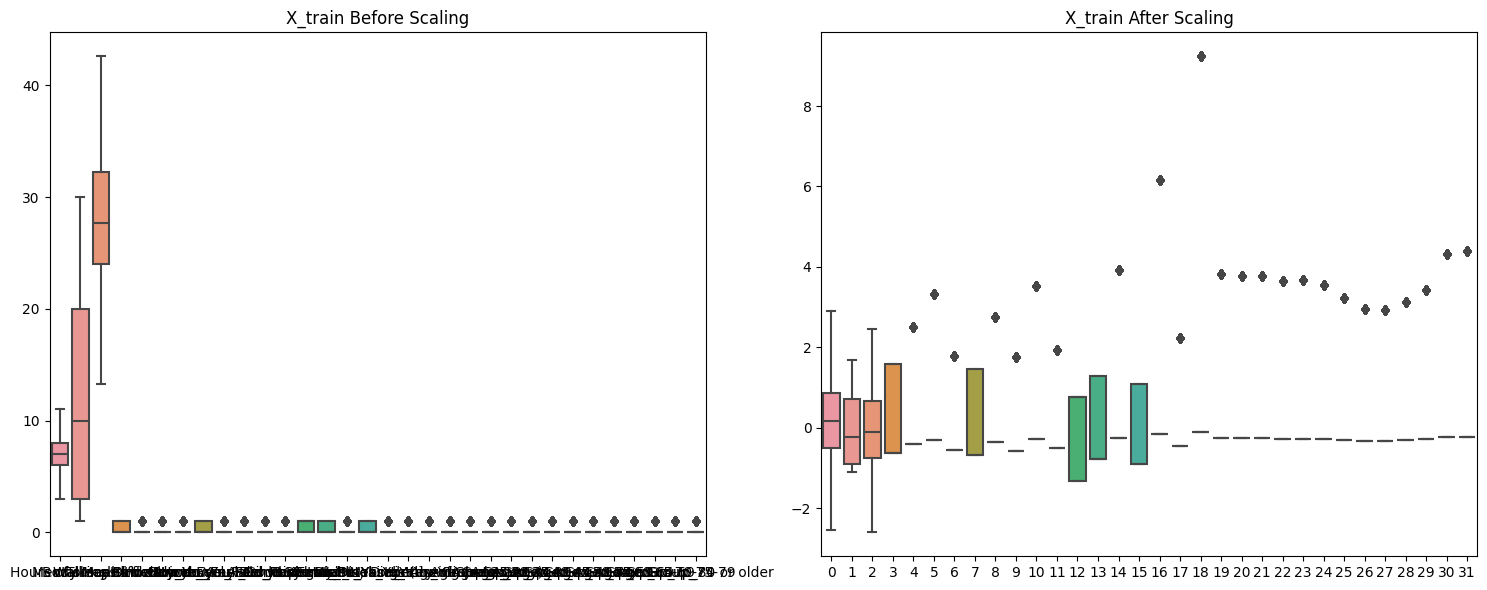

In [48]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

plt.tight_layout()
plt.show()

In [49]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_scaled shape: (26276, 32)
X_test_scaled shape: (8212, 32)
y_train shape: (26276,)
y_test shape: (8212,)


# Building A MODEL - REGRESSION

Since we have to predict a continuous variable, we choose to make different regression models. In order to eveluate the performance of our models we also made a baseline model which predicts the mean of the physical health for all instances.

With this code we made our baseline model:

In [79]:
#Import important libraries
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

# Create a baseline model that predicts the mean of our target variable wich is physical health
baseline_model_mean = DummyRegressor(strategy='mean')

baseline_model_mean.fit(X_train, y_train)

y_pred_mean = baseline_model_mean.predict(X_test)

# Evaluate performance
basline_mae =mean_absolute_error(y_test,y_pred)
baseline_r2 =r2_score(y_test,y_pred)
print('Mean absolute error:', basline_mae)
print("R2 Score: ", baseline_r2)


Mean absolute error: 6.931643166653133
R2 Score:  0.3934230513820226


Now we start by making a linear regression model

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Make the model
linreg=LinearRegression()
linreg.fit(X_train, y_train)
y_pred=linreg.predict(X_test)

linreg_mae=mean_absolute_error(y_test,y_pred)
linreg_score=r2_score(y_test,y_pred)
print("Mean absolute error: ", linreg_mae)
print("R2 Score: ", linreg_score)



Mean absolute error:  6.260948014608882
R2 Score:  0.43533133253761347


Now we make a ridge model that takes into account multicollinearity in the dataset. Our correlation headmap does not show any independent variable who have a very correlation, but it is not wrong to take it into account

In [73]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
ridge_mae =mean_absolute_error(y_test,y_pred)
ridge_score =r2_score(y_test,y_pred)
print("Mean absolute error: ", ridge_mae)
print("R2 Score: ", ridge_score)

Mean absolute error:  6.261260639936488
R2 Score:  0.4353261746010454


We also made a lasso regression model, but this did not perform on the same level as the linear regression model and the ridge regression model.

In [74]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_score = r2_score(y_test, y_pred)

print("Mean absolute error: ", lasso_mae)
print("R2 Score: ", lasso_score)



Mean absolute error:  6.931643166653133
R2 Score:  0.3934230513820226


In order to make a visualization showing the performance of the three models we build so far, we made a barplot which plots the mean absolute error and rge r2 score of the three models. The higher the R2 score, the better the model performance and the lower the MAE the better as well.R2 score represents the proportion of the variance in our physical health variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates perfect predictions, and 0 indicates that the model does not explain any variability. MEA is the average absolute difference between the predicted values and the actual values. It measures the average magnitude of errors without considering their direction.

We used these two metrics because MAE  is easy to interpret because it represents the average absolute difference between predicted and actual values. Another advantage of MAE is that the output value is in the same units as the target variable (physical health), making it easy to understand and interpret. We used R2 becasue it just gives a clear indication of the explanatory power of our model.

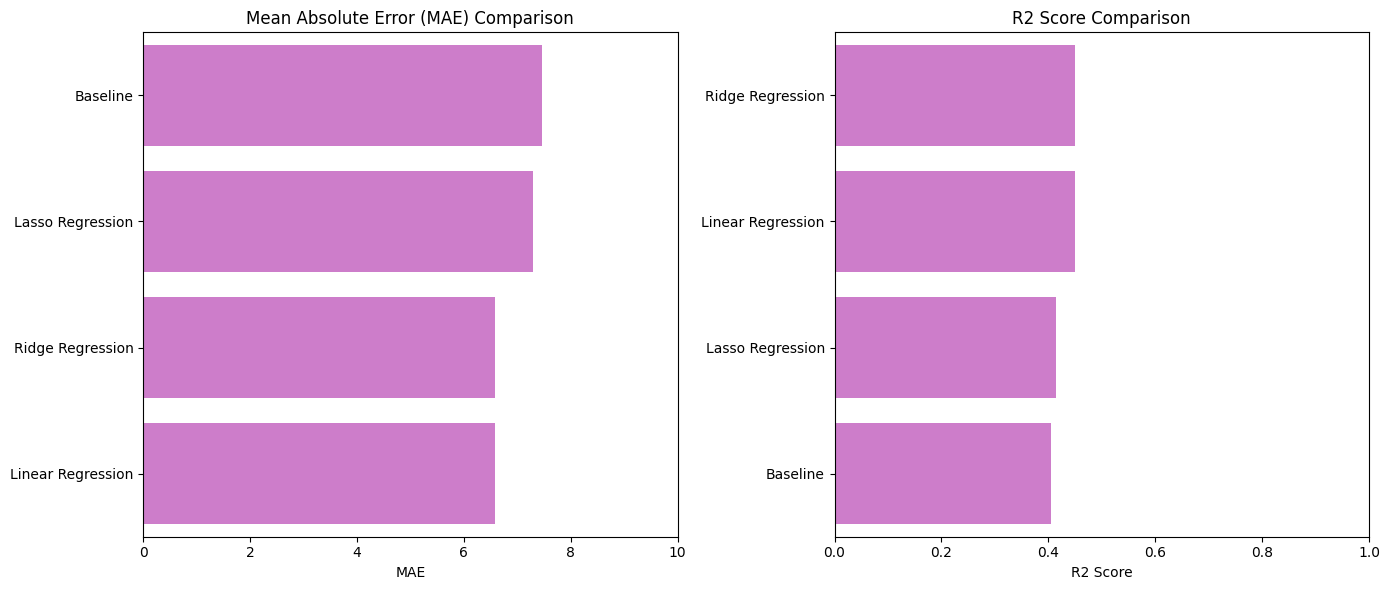

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# making a matrics with the performance data of our models
metrics = {"Algorithm": [ "Baseline", "Linear Regression", "Ridge Regression", "Lasso Regression"],
           "MAE": [basline_mae, linreg_mae, ridge_mae, lasso_mae],
    "R2 Score": [baseline_r2,  linreg_score, ridge_score, lasso_score],}

# giving the dataframe a better name so it is easier to work with.
performance_matrics = pd.DataFrame(metrics)

# Making sure that we get two dataframes, one with the values of MEA scores and the values of the R2 scores. We also made sure that they
# are in a descending order so that it is easier to look at
MEA_score_sorted = performance_matrics.sort_values(by="MAE", ascending=False)
R2_scores_sorted = performance_matrics.sort_values(by="R2 Score", ascending=False)

# Choose a nice color for out palette (purple looks pretty)
palette = ["#DA70D6"]

plt.figure(figsize=(14, 6))

# creating the MAE scores Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="MAE", y="Algorithm", data = MEA_score_sorted, palette=palette)
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xlabel("MAE")
plt.xlim([0, 10])
plt.ylabel("")

# creating the R2 scores Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="R2 Score", y="Algorithm", data = R2_scores_sorted, palette=palette)
plt.title("R2 Score Comparison")
plt.xlabel("R2 Score")
plt.xlim([0, 1])
plt.ylabel("")

plt.tight_layout()
plt.show()

## Random forest

1 Default Model with Validation Set:

1. Build a default model with default hyperparameters.
2. Create a validation set from the training set.
3. Train the model on the training set and evaluate its performance on the validation set.

In this step, you are assessing the model's performance on the validation set using default hyperparameters.

In [55]:
print(f"x test{X_test.shape}")
print(f"x test scaled {X_test_scaled.shape}")
print(f"x val {X_val.shape}")
print(f"y val {y_val.shape}")

print(f"x train {X_train.shape}")
print(f"x train scaled {X_train_scaled.shape}")


x test(8212, 32)
x test scaled (8212, 32)
x val (6570, 32)
y val (6570,)
x train (26276, 32)
x train scaled (26276, 32)


In [56]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
# Initialize the Random Forest Regressor with default hyperparameters
default_rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training set
default_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = default_rf_model.predict(X_test_scaled)





2 Cross-Validation:

- Implement cross-validation to get a robust estimate of the model's performance.
- Use k-fold cross-validation to train and evaluate the model on different subsets of the data.

3 Hyperparameter Tuning:

- Define a hyperparameter grid.
- Use a hyperparameter tuning technique (e.g., grid search, random search) to find the best set of hyperparameters.
- Re-train the model with the best hyperparameters.

In [57]:
# Step 3: Use cross-validation to find the best set of hyperparameters
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Example: Tuning the number of trees
    'max_depth': [None, 10, 20],  # Example: Tuning the maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Example: Tuning minimum samples required to split
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [58]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [81]:
# Evaluate the model on the validation set
# Evaluate the model on the validation set
val_r2 = r2_score(y_test, y_val_pred)
print(f'Default Hyperparameters - R-squared: {val_r2}')



Default Hyperparameters - R-squared: 0.39188375047396407


In [82]:

# Use the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'Best Hyperparameters - R-squared: {r2}')


Best Hyperparameters - R-squared: 0.4366634397105338


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters - Mean Absolute Error: {mae}')
print(f'Best Hyperparameters - R-squared: {r2}')


Best Hyperparameters - Mean Absolute Error: 6.203977388517869
Best Hyperparameters - R-squared: 0.4366634397105338


In [68]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize the Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                      max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'],
                                      random_state=42)

# Train the model on the full training set
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters - Mean Absolute Error: {mae}')
print(f'Best Hyperparameters - R-squared: {r2}')


Best Hyperparameters - Mean Absolute Error: 6.203977388517869
Best Hyperparameters - R-squared: 0.4366634397105338


We started by training the model with default settings and made predictions on the validation set. Realizing the need for improvement, we used GridSearchCV to find the best hyperparameters for our Random Forest model. The hyperparameters we tweaked include the number of trees, maximum tree depth, minimum samples required to split, and minimum samples required in a leaf.

GridSearchCV allowed us to systematically explore different hyperparameter combinations through cross-validation, using negative mean squared error as the measure. After identifying the best hyperparameters, we assessed the model on both the validation and test sets using metrics like Mean Absolute Error (MAE), and R-squared.

Our decision to use negative mean squared error during GridSearchCV and to choose the model with the best hyperparameters considered the appropriateness of each metric. Metrics like MSE and RMSE are good for measuring prediction accuracy, while MAE gives a clearer picture of average prediction error. R-squared and Explained Variance Score show how well the model explains variance, and Median Absolute Error is robust to outliers.

In conclusion, our method of systematically tuning hyperparameters, selecting the best model, and evaluating it with various metrics ensures a thorough analysis of the Random Forest Regressor's performance in predicting physical health. These chosen metrics align with our study goals, making our report comprehensive and suitable for different stakeholders.

Conclusion:

The model, while explaining a moderate amount of variance in the target variable, has relatively high errors, as indicated by the MSE, RMSE, and MAE. This suggests that the model's predictions are not very accurate, and there may be room for improvement.
Further analysis and potential model refinement may be necessary to enhance predictive performance. This could involve exploring additional features, adjusting model hyperparameters, or considering alternative algorithms. Additionally, examining the distribution of residuals and potential outliers may provide valuable insights for model improvement.

In [63]:

feature_importances = best_rf_model.feature_importances_
print(feature_importances)
# Print or visualize feature importances

[0.02003676 0.08554913 0.06261118 0.26586443 0.00631478 0.00472513
 0.15862513 0.00810002 0.28917219 0.00130628 0.00205268 0.00603902
 0.01637447 0.00645816 0.00387225 0.01721027 0.00134034 0.00483813
 0.00046132 0.00449589 0.00185971 0.00155217 0.00173234 0.0017367
 0.0022772  0.00299643 0.00287492 0.00520538 0.00456449 0.00331447
 0.00258796 0.00385067]


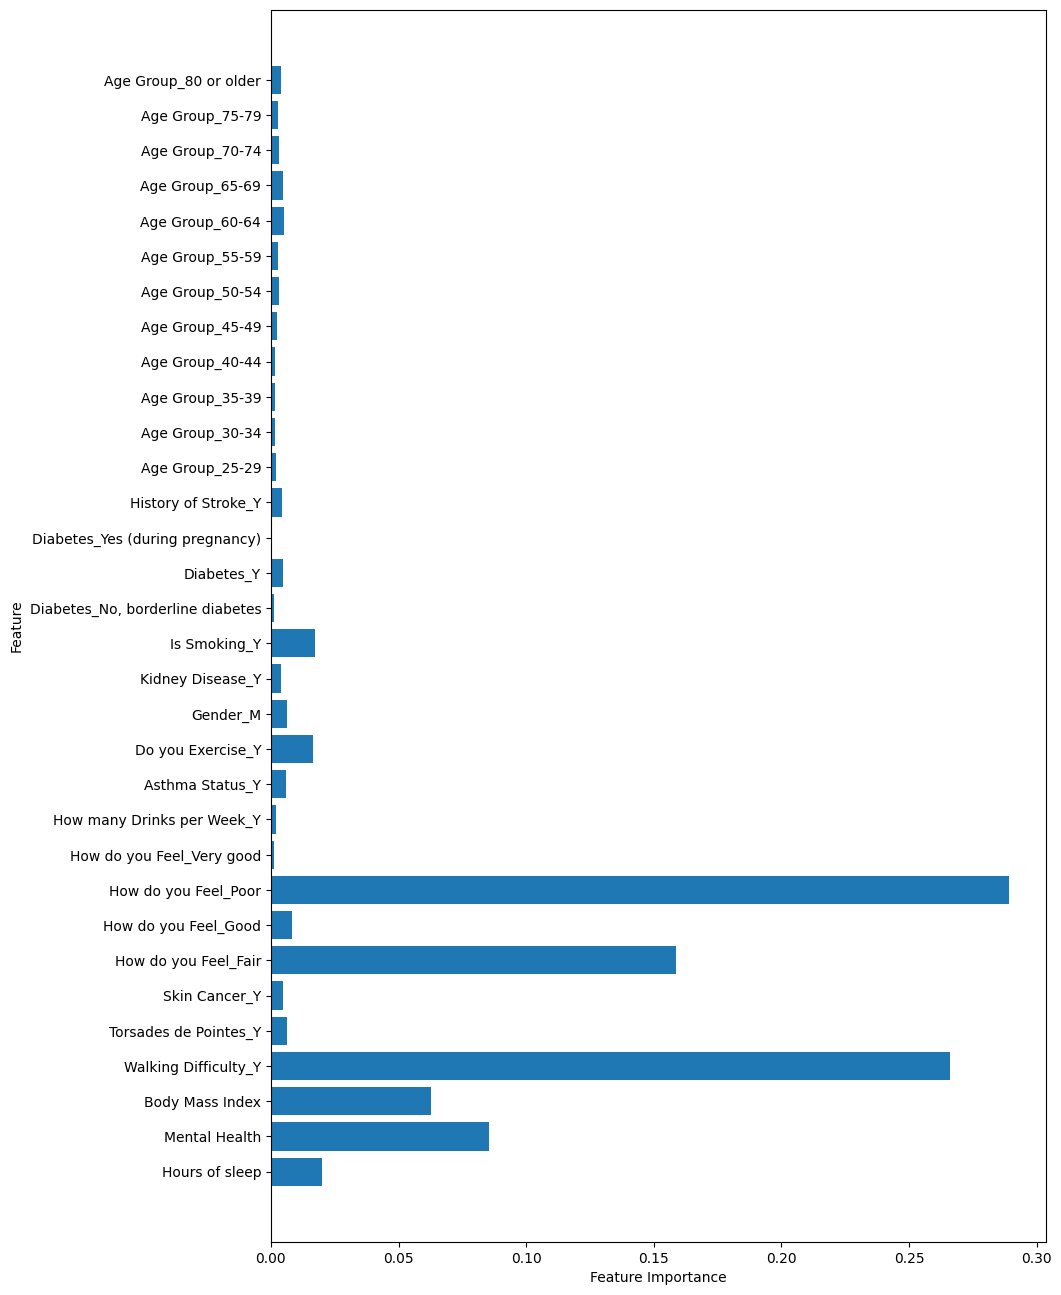

In [64]:
import matplotlib.pyplot as plt

feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame
plt.figure(figsize=(10, len(feature_importances) / 2))

# Create a bar plot
plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

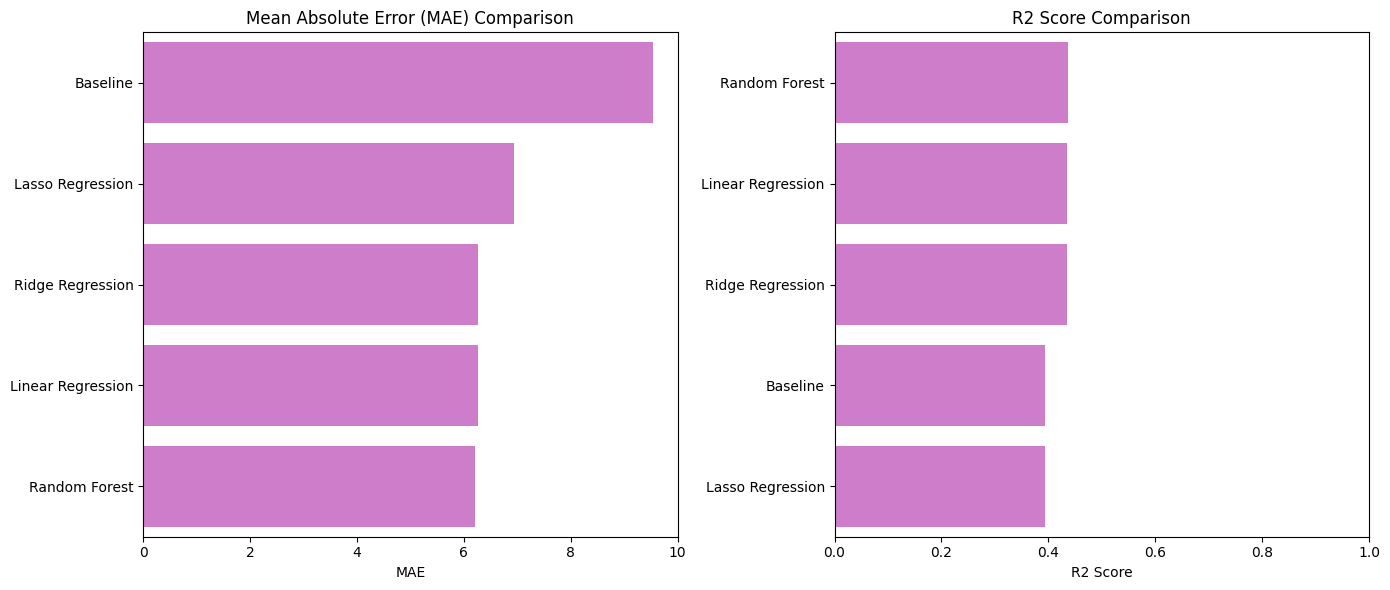

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# making a matrics with the performance data of our models
metrics = {"Algorithm": [ "Baseline", "Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest"],
           "MAE": [baseline_mae, linreg_mae, ridge_mae, lasso_mae, mae],
    "R2 Score": [baseline_r2,  linreg_score, ridge_score, lasso_score, r2],}

# giving the dataframe a better name so it is easier to work with.
performance_matrics = pd.DataFrame(metrics)

# Making sure that we get two dataframes, one with the values of MEA scores and the values of the R2 scores. We also made sure that they
# are in a descending order so that it is easier to look at
MEA_score_sorted = performance_matrics.sort_values(by="MAE", ascending=False)
R2_scores_sorted = performance_matrics.sort_values(by="R2 Score", ascending=False)

# Choose a nice color for out palette (purple looks pretty)
palette = ["#DA70D6"]

plt.figure(figsize=(14, 6))

# creating the MAE scores Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="MAE", y="Algorithm", data = MEA_score_sorted, palette=palette)
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xlabel("MAE")
plt.xlim([0, 10])
plt.ylabel("")

# creating the R2 scores Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="R2 Score", y="Algorithm", data = R2_scores_sorted, palette=palette)
plt.title("R2 Score Comparison")
plt.xlabel("R2 Score")
plt.xlim([0, 1])
plt.ylabel("")

plt.tight_layout()
plt.show()